### Построение графовой нейронной сети для детекции CPD

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import itertools
import networkx as nx

import pickle

%config InlineBackend.figure_format = 'retina'


import os
import pickle
from tqdm import tqdm

In [2]:
returns = pd.read_csv("returns_crypto.csv")

### HCGNN

In [3]:
from Graph_module import GraphBuilder,GraphAnalysis
from HCGNN_module import ChangePointDetector

/opt/anaconda3/lib/python3.11/site-packages/numba/core/decorators.py:250: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)


In [4]:
# загрузка и чтение уже готовых графов
graph_load = GraphAnalysis()
path = 'graphs_entropy'
te_graphs_files = [file for file in os.listdir(path) if file.endswith('.pkl')]

graphs, laplacian_stats = graph_load.load_graphs_and_laplacian_stats(te_graphs_files,path)


**Результат подбора гиперпараметров**

In [123]:
returns = pd.read_csv("returns_crypto.csv")
returns.iloc[:,1:].columns

Index(['BTC-USD', 'ETH-USD', 'USDT-USD', 'BNB-USD', 'XRP-USD', 'DOGE-USD',
       'ADA-USD', 'TRX-USD', 'LINK-USD', 'BCH-USD', 'LTC-USD', 'ETC-USD',
       'FIL-USD', 'XMR-USD', 'XLM-USD', 'MKR-USD', 'THETA-USD', 'KCS-USD',
       'AGIX-USD', 'NEO-USD', 'GNO-USD', 'XTZ-USD', 'NEXO-USD', 'EOS-USD',
       'SNX-USD', 'MANA-USD', 'BTG-USD', 'XDC-USD', 'IOTX-USD', 'TUSD-USD',
       'GLM-USD', 'ANT-USD', 'ZIL-USD', 'ZEC-USD', 'ZRX-USD', 'ENJ-USD',
       'ABT-USD', 'RVN-USD', 'TRAC-USD', 'SC-USD', 'ELF-USD', 'QTUM-USD',
       'BAT-USD', 'LRC-USD', 'DASH-USD', 'DCR-USD', 'GAS-USD', 'Date'],
      dtype='object')

100%|██████████| 50/50 [00:36<00:00,  1.36it/s]


Best Parameters: {'hidden_channels': 8, 'lr': 0.01, 'num_epochs': 50}
Best Validation Loss: 0.35498717427253723


100%|██████████| 50/50 [00:36<00:00,  1.36it/s]


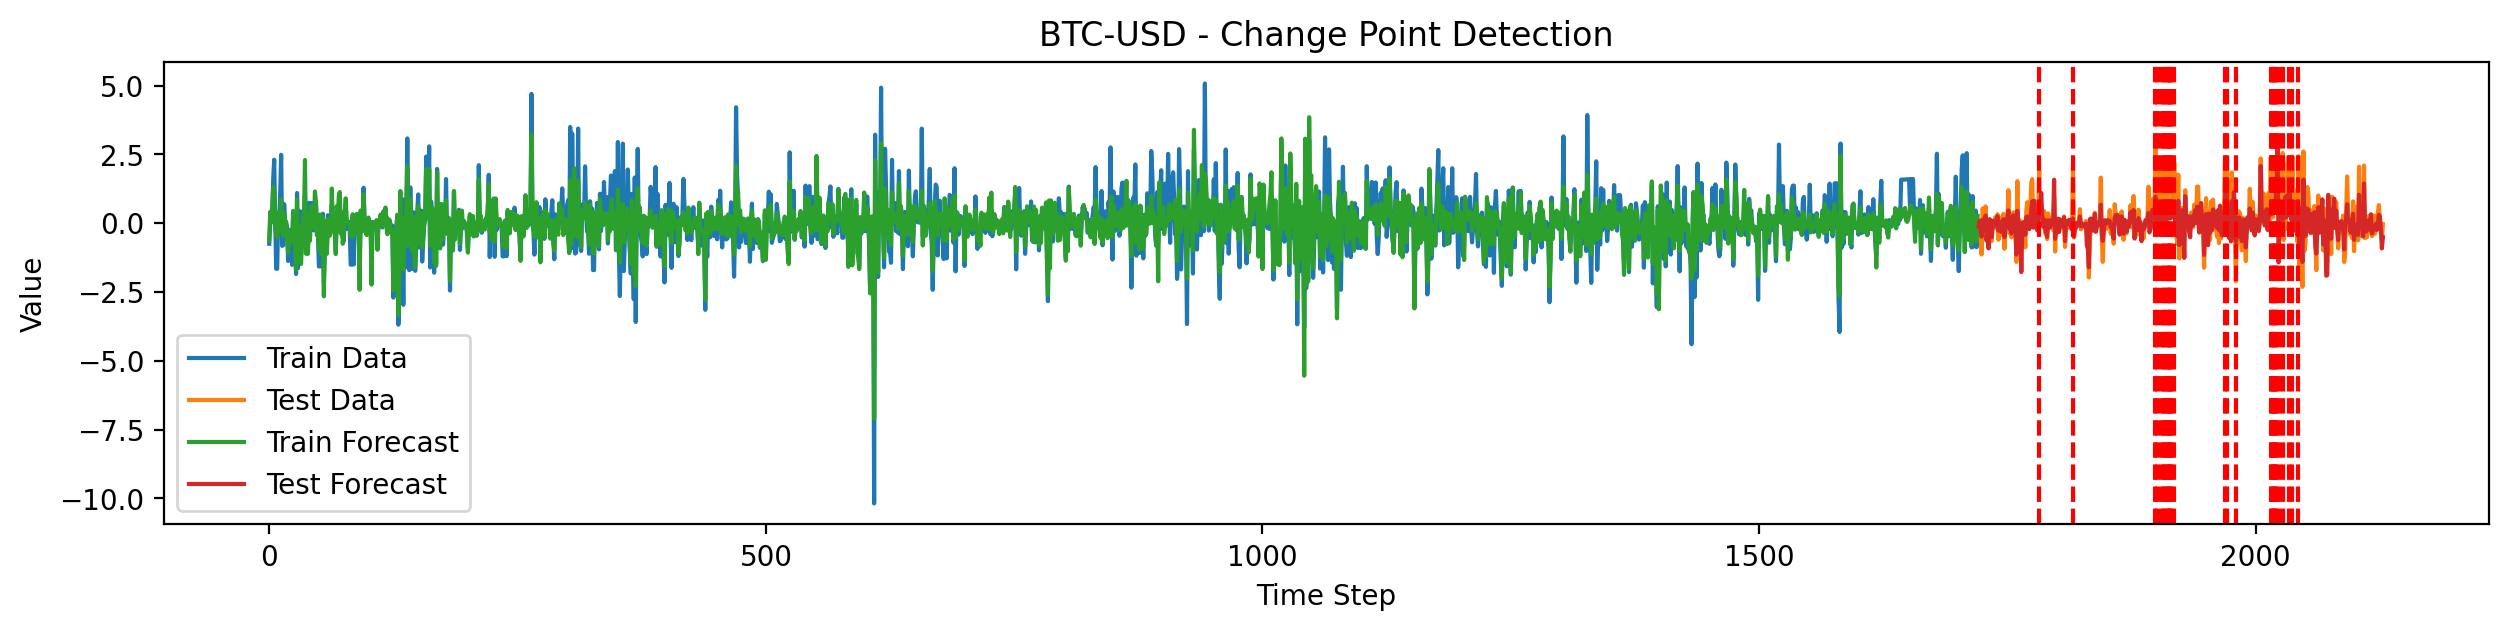

In [94]:
# поиск гиперпараметров для модели
detector = ChangePointDetector('returns_crypto.csv')

# Определение диапазонов гиперпараметров
param_grid = {
    'hidden_channels': [8, 16, 32, 64],
    'lr': [0.001, 0.01, 0.1],
    'num_epochs': [10, 20, 50]
}

# Выполнение случайного поиска
best_params, best_loss = detector.random_search(param_grid, n_iter=20)
print(f"Best Parameters: {best_params}")
print(f"Best Validation Loss: {best_loss}")

# Обучение модели с наилучшими гиперпараметрами
detector.hidden_channels = best_params['hidden_channels']
detector.lr = best_params['lr']
detector.num_epochs = best_params['num_epochs']
detector.train_model()
change_points, residuals_list = detector.detect_change_points()
detector.plot_individual_series(change_points, 'BTC-USD')

##### Граф на основе трансфертной энтропии

Training Model:   2%|▏         | 1/50 [00:00<00:33,  1.44it/s]

Epoch 000, Loss: 0.5444


Training Model:   4%|▍         | 2/50 [00:01<00:31,  1.52it/s]

Epoch 001, Loss: 0.5433


Training Model:   6%|▌         | 3/50 [00:01<00:31,  1.51it/s]

Epoch 002, Loss: 0.5430


Training Model:   8%|▊         | 4/50 [00:02<00:29,  1.54it/s]

Epoch 003, Loss: 0.5431


Training Model:  10%|█         | 5/50 [00:03<00:28,  1.56it/s]

Epoch 004, Loss: 0.5429


Training Model:  12%|█▏        | 6/50 [00:03<00:27,  1.58it/s]

Epoch 005, Loss: 0.5427


Training Model:  14%|█▍        | 7/50 [00:04<00:27,  1.58it/s]

Epoch 006, Loss: 0.5427


Training Model:  16%|█▌        | 8/50 [00:05<00:26,  1.60it/s]

Epoch 007, Loss: 0.5426


Training Model:  18%|█▊        | 9/50 [00:05<00:25,  1.59it/s]

Epoch 008, Loss: 0.5424


Training Model:  20%|██        | 10/50 [00:06<00:25,  1.58it/s]

Epoch 009, Loss: 0.5422


Training Model:  22%|██▏       | 11/50 [00:06<00:24,  1.60it/s]

Epoch 010, Loss: 0.5425


Training Model:  24%|██▍       | 12/50 [00:07<00:23,  1.61it/s]

Epoch 011, Loss: 0.5430


Training Model:  26%|██▌       | 13/50 [00:08<00:22,  1.61it/s]

Epoch 012, Loss: 0.5421


Training Model:  28%|██▊       | 14/50 [00:08<00:22,  1.62it/s]

Epoch 013, Loss: 0.5430


Training Model:  30%|███       | 15/50 [00:09<00:21,  1.61it/s]

Epoch 014, Loss: 0.5421


Training Model:  32%|███▏      | 16/50 [00:10<00:20,  1.62it/s]

Epoch 015, Loss: 0.5422


Training Model:  34%|███▍      | 17/50 [00:10<00:20,  1.61it/s]

Epoch 016, Loss: 0.5422


Training Model:  36%|███▌      | 18/50 [00:11<00:19,  1.61it/s]

Epoch 017, Loss: 0.5422


Training Model:  38%|███▊      | 19/50 [00:11<00:19,  1.61it/s]

Epoch 018, Loss: 0.5420


Training Model:  40%|████      | 20/50 [00:12<00:18,  1.62it/s]

Epoch 019, Loss: 0.5421


Training Model:  42%|████▏     | 21/50 [00:13<00:17,  1.62it/s]

Epoch 020, Loss: 0.5420


Training Model:  44%|████▍     | 22/50 [00:13<00:17,  1.62it/s]

Epoch 021, Loss: 0.5420


Training Model:  46%|████▌     | 23/50 [00:14<00:16,  1.62it/s]

Epoch 022, Loss: 0.5420


Training Model:  48%|████▊     | 24/50 [00:15<00:16,  1.61it/s]

Epoch 023, Loss: 0.5421


Training Model:  50%|█████     | 25/50 [00:15<00:15,  1.61it/s]

Epoch 024, Loss: 0.5420


Training Model:  52%|█████▏    | 26/50 [00:16<00:15,  1.60it/s]

Epoch 025, Loss: 0.5420


Training Model:  54%|█████▍    | 27/50 [00:16<00:14,  1.55it/s]

Epoch 026, Loss: 0.5420


Training Model:  56%|█████▌    | 28/50 [00:17<00:14,  1.56it/s]

Epoch 027, Loss: 0.5419


Training Model:  58%|█████▊    | 29/50 [00:18<00:13,  1.58it/s]

Epoch 028, Loss: 0.5419


Training Model:  60%|██████    | 30/50 [00:18<00:12,  1.59it/s]

Epoch 029, Loss: 0.5418


Training Model:  62%|██████▏   | 31/50 [00:19<00:11,  1.60it/s]

Epoch 030, Loss: 0.5417


Training Model:  64%|██████▍   | 32/50 [00:20<00:11,  1.60it/s]

Epoch 031, Loss: 0.5418


Training Model:  66%|██████▌   | 33/50 [00:20<00:10,  1.60it/s]

Epoch 032, Loss: 0.5418


Training Model:  68%|██████▊   | 34/50 [00:21<00:09,  1.60it/s]

Epoch 033, Loss: 0.5418


Training Model:  70%|███████   | 35/50 [00:21<00:09,  1.57it/s]

Epoch 034, Loss: 0.5418


Training Model:  72%|███████▏  | 36/50 [00:22<00:08,  1.59it/s]

Epoch 035, Loss: 0.5418


Training Model:  74%|███████▍  | 37/50 [00:23<00:08,  1.60it/s]

Epoch 036, Loss: 0.5418


Training Model:  76%|███████▌  | 38/50 [00:23<00:07,  1.61it/s]

Epoch 037, Loss: 0.5418


Training Model:  78%|███████▊  | 39/50 [00:24<00:07,  1.57it/s]

Epoch 038, Loss: 0.5418


Training Model:  80%|████████  | 40/50 [00:25<00:06,  1.59it/s]

Epoch 039, Loss: 0.5418


Training Model:  82%|████████▏ | 41/50 [00:25<00:05,  1.60it/s]

Epoch 040, Loss: 0.5418


Training Model:  84%|████████▍ | 42/50 [00:26<00:04,  1.61it/s]

Epoch 041, Loss: 0.5418


Training Model:  86%|████████▌ | 43/50 [00:26<00:04,  1.60it/s]

Epoch 042, Loss: 0.5418


Training Model:  88%|████████▊ | 44/50 [00:27<00:03,  1.61it/s]

Epoch 043, Loss: 0.5418


Training Model:  90%|█████████ | 45/50 [00:28<00:03,  1.61it/s]

Epoch 044, Loss: 0.5418


Training Model:  92%|█████████▏| 46/50 [00:28<00:02,  1.61it/s]

Epoch 045, Loss: 0.5418


Training Model:  94%|█████████▍| 47/50 [00:29<00:01,  1.61it/s]

Epoch 046, Loss: 0.5418


Training Model:  96%|█████████▌| 48/50 [00:30<00:01,  1.60it/s]

Epoch 047, Loss: 0.5418


Training Model:  98%|█████████▊| 49/50 [00:30<00:00,  1.61it/s]

Epoch 048, Loss: 0.5418


Training Model: 100%|██████████| 50/50 [00:31<00:00,  1.60it/s]

Epoch 049, Loss: 0.5418


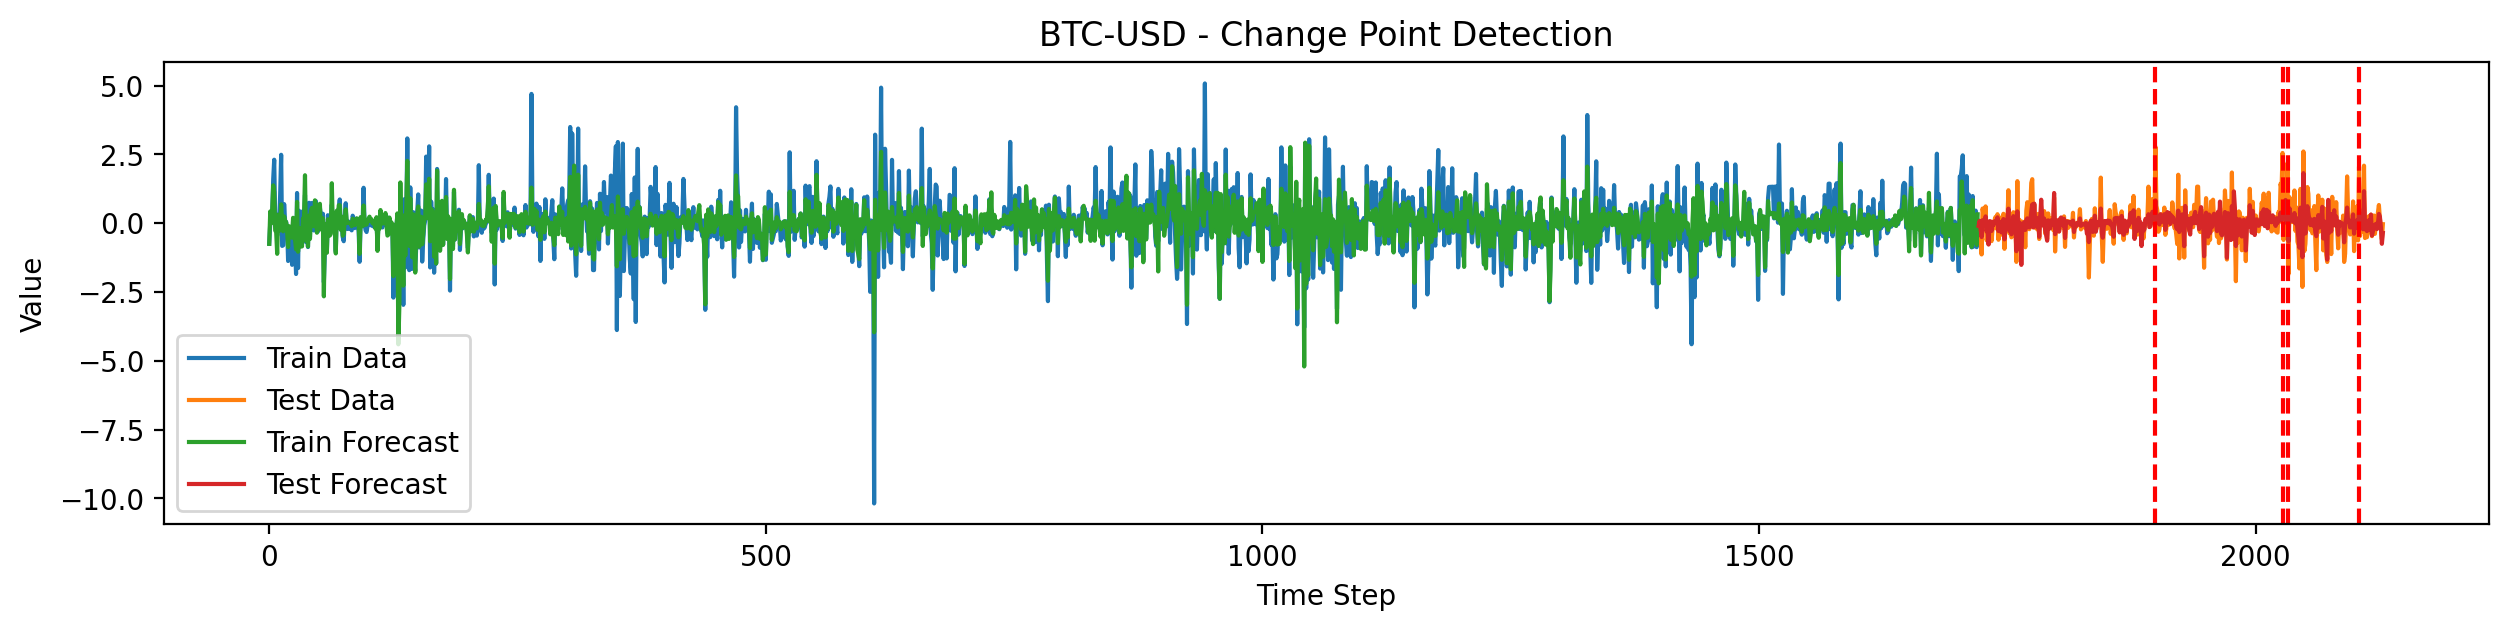

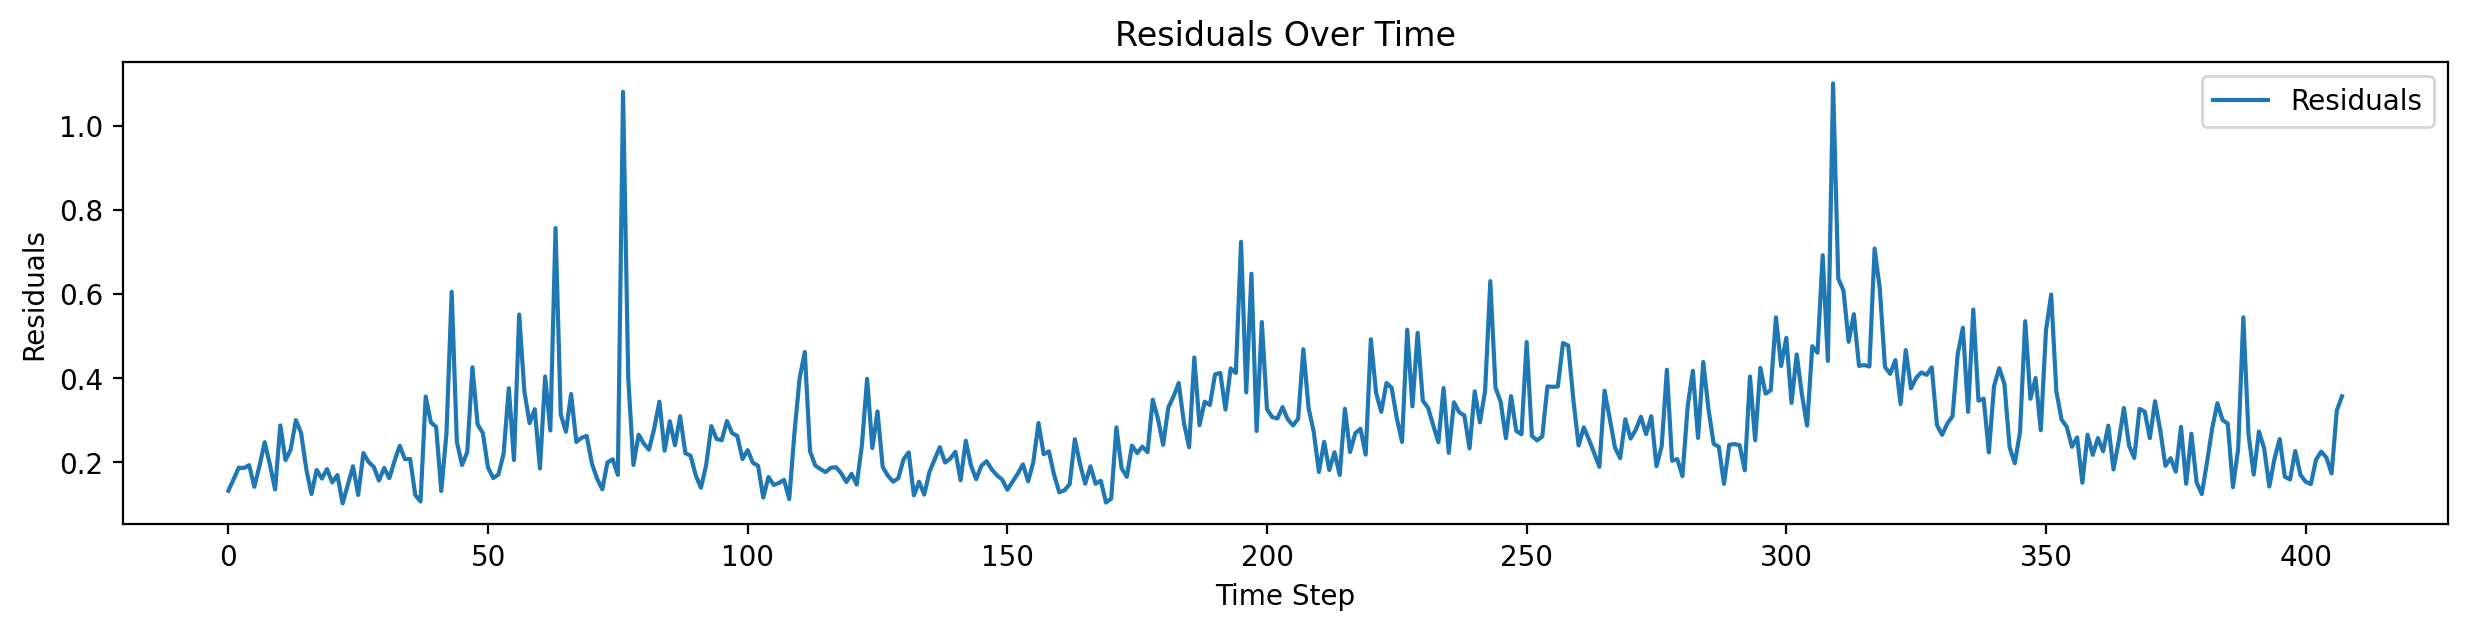

In [122]:
detector = ChangePointDetector('returns_crypto.csv', graph_type='entropy')
detector.train_model()
change_points, residuals_list = detector.detect_change_points()
detector.plot_individual_series(change_points, 'BTC-USD')
detector.plot_residuals(residuals_list)


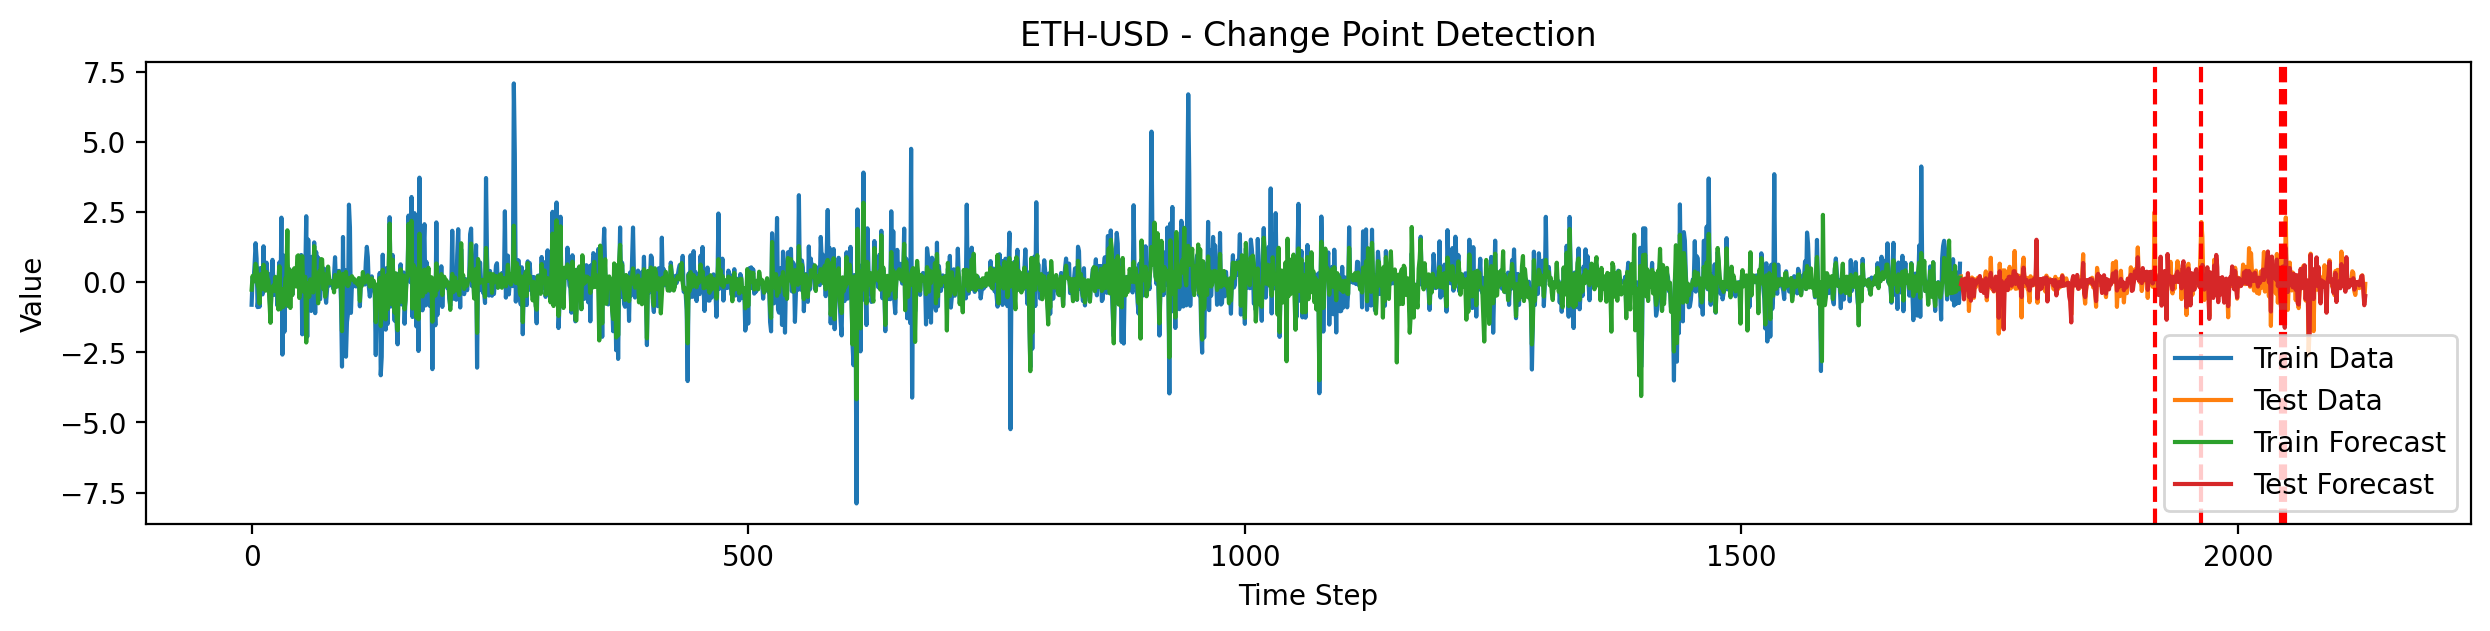

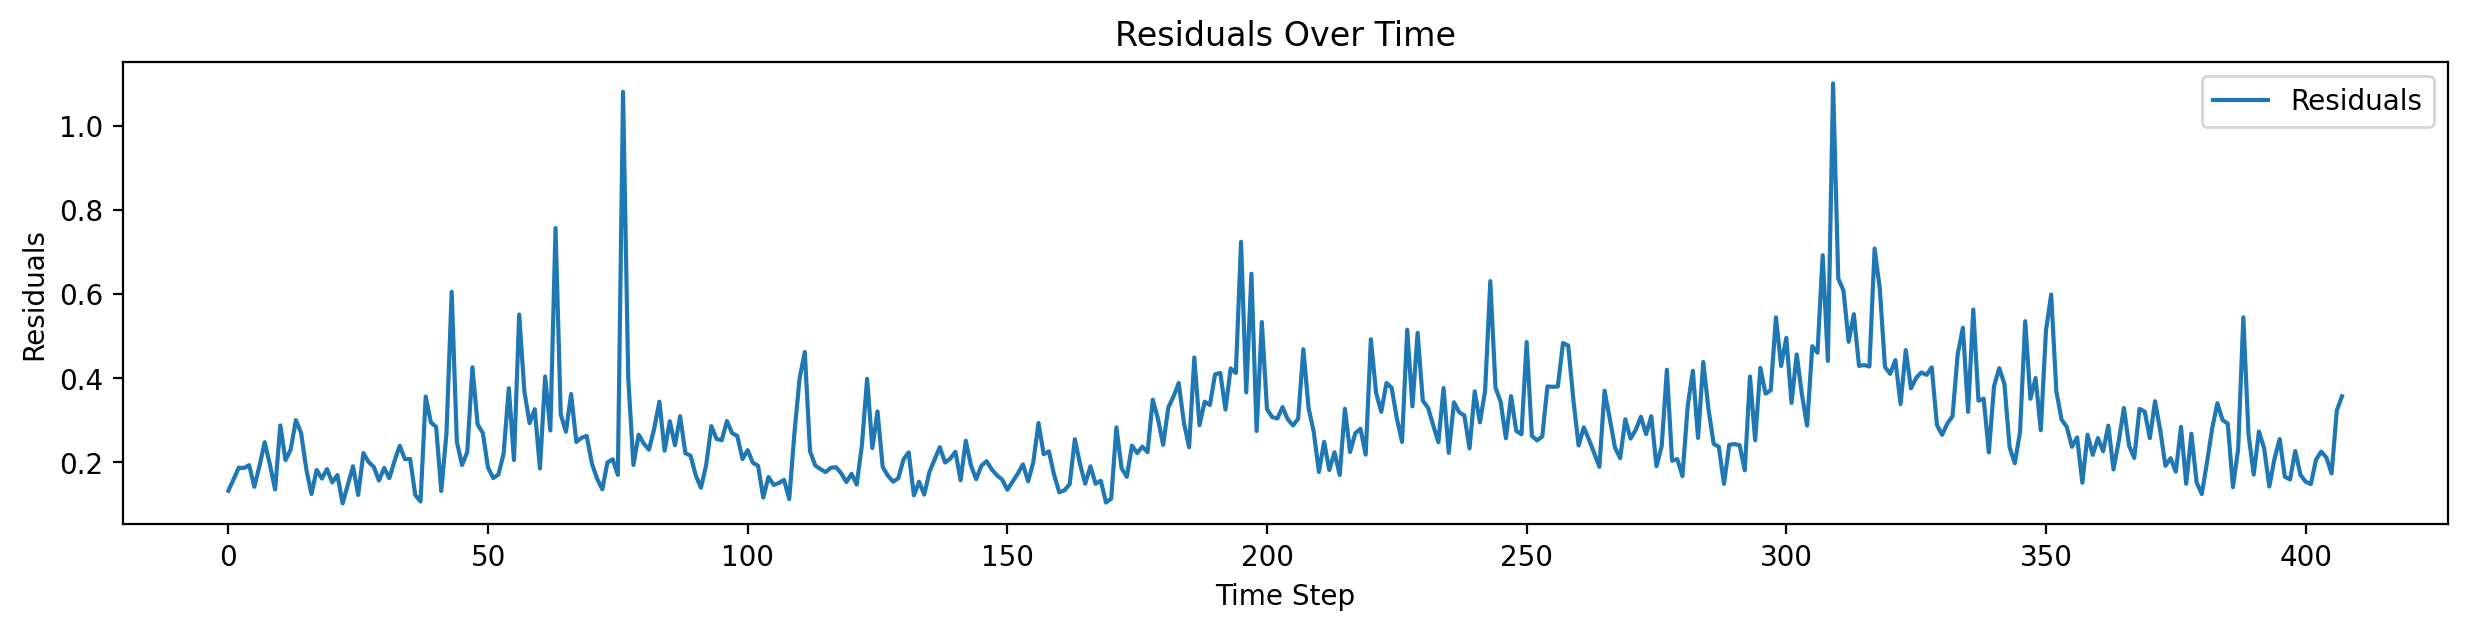

In [124]:
detector.plot_individual_series(change_points, 'ETH-USD')
detector.plot_residuals(residuals_list)


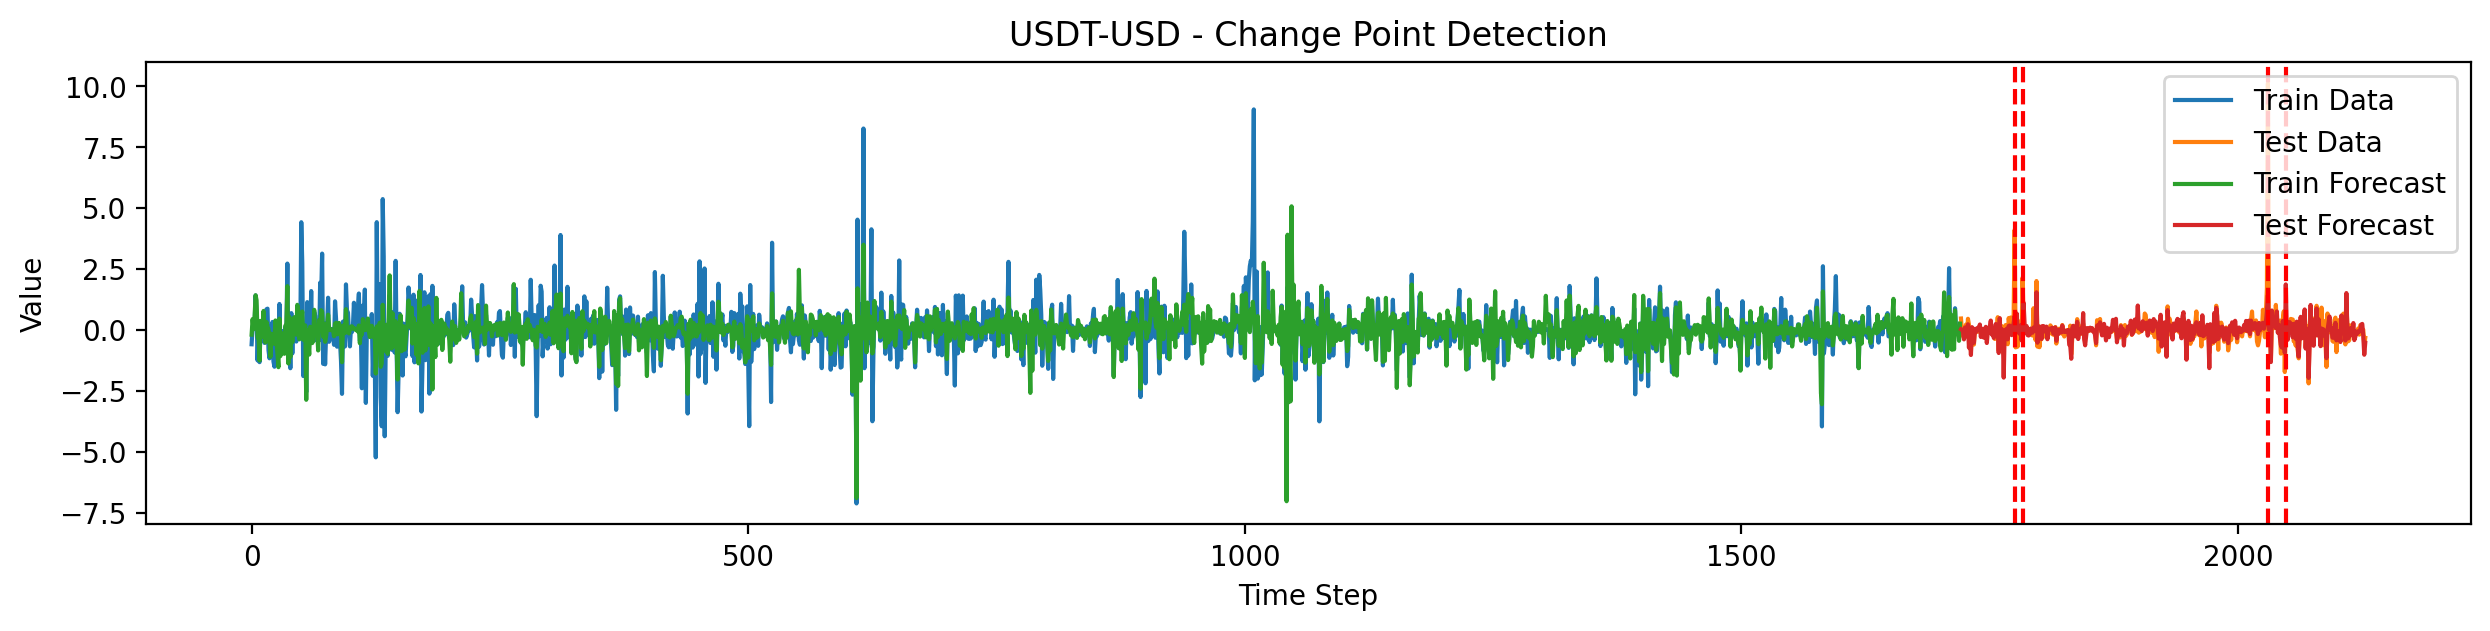

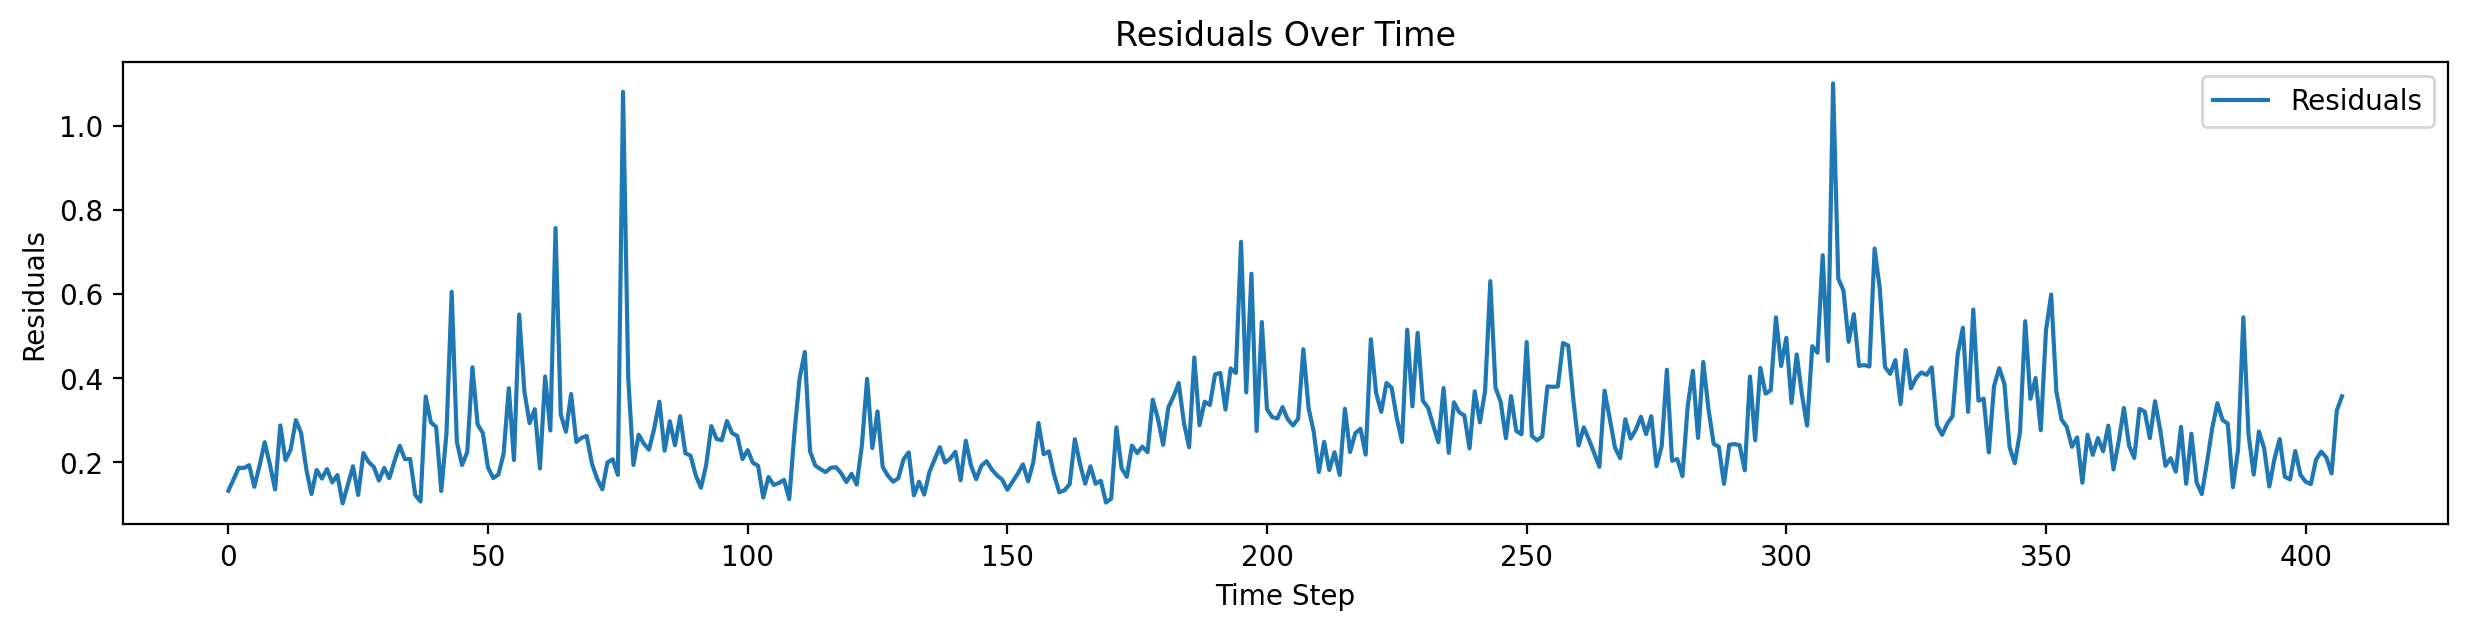

In [125]:
detector.plot_individual_series(change_points, 'USDT-USD')
detector.plot_residuals(residuals_list)


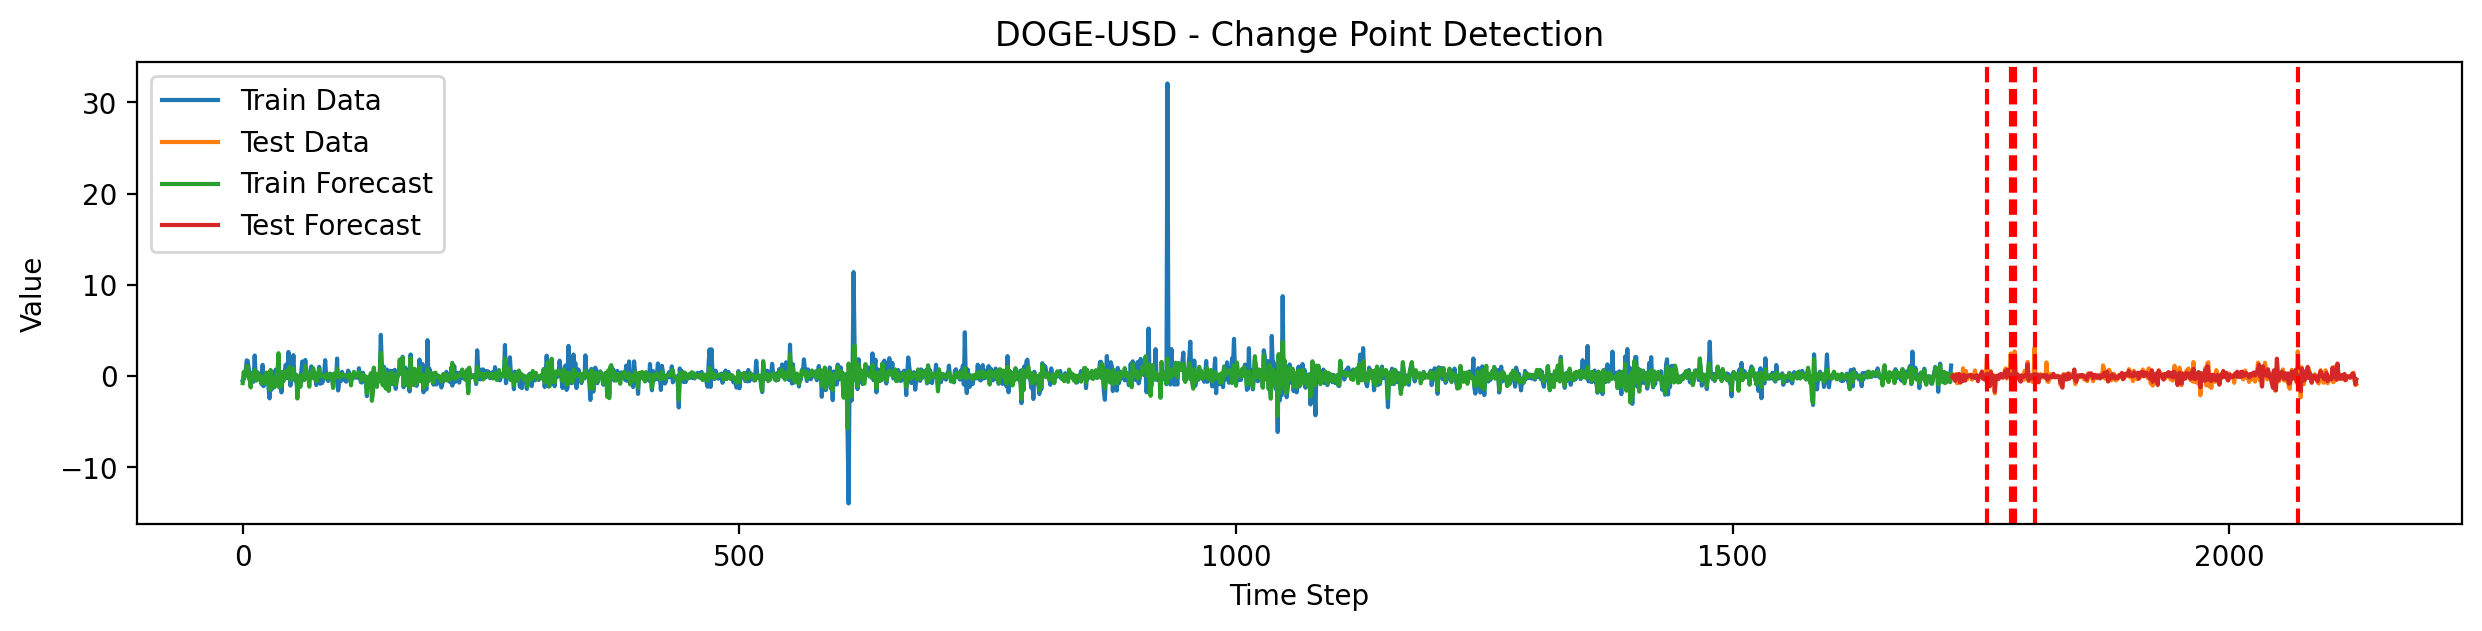

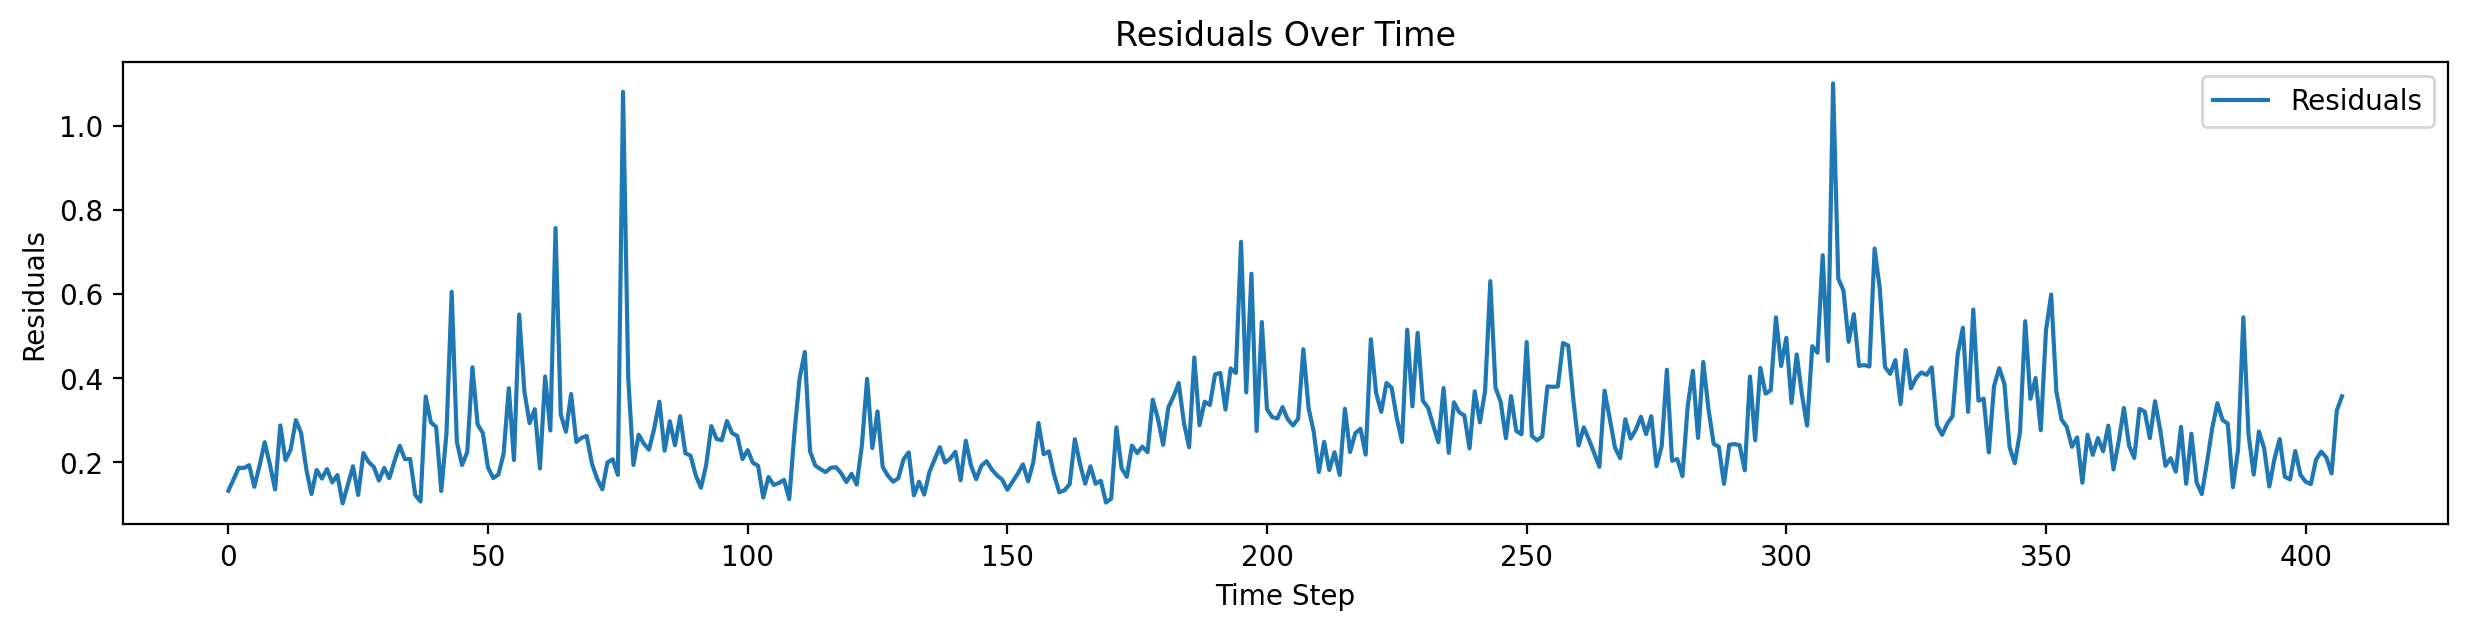

In [126]:
detector.plot_individual_series(change_points, 'DOGE-USD')
detector.plot_residuals(residuals_list)

##### Граф на основе корреляций

Training Model:   2%|▏         | 1/50 [00:00<00:37,  1.30it/s]

Epoch 000, Loss: 0.4092


Training Model:   4%|▍         | 2/50 [00:01<00:35,  1.35it/s]

Epoch 001, Loss: 0.4017


Training Model:   6%|▌         | 3/50 [00:02<00:35,  1.31it/s]

Epoch 002, Loss: 0.4025


Training Model:   8%|▊         | 4/50 [00:03<00:34,  1.32it/s]

Epoch 003, Loss: 0.4017


Training Model:  10%|█         | 5/50 [00:03<00:33,  1.34it/s]

Epoch 004, Loss: 0.4017


Training Model:  12%|█▏        | 6/50 [00:04<00:32,  1.35it/s]

Epoch 005, Loss: 0.4011


Training Model:  14%|█▍        | 7/50 [00:05<00:31,  1.37it/s]

Epoch 006, Loss: 0.4011


Training Model:  16%|█▌        | 8/50 [00:05<00:30,  1.37it/s]

Epoch 007, Loss: 0.4009


Training Model:  18%|█▊        | 9/50 [00:06<00:29,  1.37it/s]

Epoch 008, Loss: 0.4009


Training Model:  20%|██        | 10/50 [00:07<00:29,  1.38it/s]

Epoch 009, Loss: 0.4008


Training Model:  22%|██▏       | 11/50 [00:08<00:28,  1.38it/s]

Epoch 010, Loss: 0.4008


Training Model:  24%|██▍       | 12/50 [00:08<00:27,  1.38it/s]

Epoch 011, Loss: 0.4009


Training Model:  26%|██▌       | 13/50 [00:09<00:27,  1.36it/s]

Epoch 012, Loss: 0.4009


Training Model:  28%|██▊       | 14/50 [00:10<00:26,  1.37it/s]

Epoch 013, Loss: 0.4007


Training Model:  30%|███       | 15/50 [00:11<00:25,  1.38it/s]

Epoch 014, Loss: 0.4007


Training Model:  32%|███▏      | 16/50 [00:11<00:24,  1.37it/s]

Epoch 015, Loss: 0.4007


Training Model:  34%|███▍      | 17/50 [00:12<00:23,  1.38it/s]

Epoch 016, Loss: 0.4007


Training Model:  36%|███▌      | 18/50 [00:13<00:23,  1.38it/s]

Epoch 017, Loss: 0.4007


Training Model:  38%|███▊      | 19/50 [00:13<00:22,  1.38it/s]

Epoch 018, Loss: 0.4007


Training Model:  40%|████      | 20/50 [00:14<00:21,  1.39it/s]

Epoch 019, Loss: 0.4007


Training Model:  42%|████▏     | 21/50 [00:15<00:20,  1.40it/s]

Epoch 020, Loss: 0.4007


Training Model:  44%|████▍     | 22/50 [00:16<00:19,  1.40it/s]

Epoch 021, Loss: 0.4006


Training Model:  46%|████▌     | 23/50 [00:16<00:19,  1.39it/s]

Epoch 022, Loss: 0.4006


Training Model:  48%|████▊     | 24/50 [00:17<00:18,  1.38it/s]

Epoch 023, Loss: 0.4006


Training Model:  50%|█████     | 25/50 [00:18<00:17,  1.39it/s]

Epoch 024, Loss: 0.4006


Training Model:  52%|█████▏    | 26/50 [00:18<00:17,  1.39it/s]

Epoch 025, Loss: 0.4006


Training Model:  54%|█████▍    | 27/50 [00:19<00:16,  1.39it/s]

Epoch 026, Loss: 0.4005


Training Model:  56%|█████▌    | 28/50 [00:20<00:15,  1.39it/s]

Epoch 027, Loss: 0.4006


Training Model:  58%|█████▊    | 29/50 [00:21<00:15,  1.39it/s]

Epoch 028, Loss: 0.4005


Training Model:  60%|██████    | 30/50 [00:21<00:14,  1.39it/s]

Epoch 029, Loss: 0.4005


Training Model:  62%|██████▏   | 31/50 [00:22<00:13,  1.39it/s]

Epoch 030, Loss: 0.4005


Training Model:  64%|██████▍   | 32/50 [00:23<00:12,  1.40it/s]

Epoch 031, Loss: 0.4005


Training Model:  66%|██████▌   | 33/50 [00:23<00:12,  1.38it/s]

Epoch 032, Loss: 0.4005


Training Model:  68%|██████▊   | 34/50 [00:24<00:11,  1.37it/s]

Epoch 033, Loss: 0.4005


Training Model:  70%|███████   | 35/50 [00:25<00:11,  1.35it/s]

Epoch 034, Loss: 0.4005


Training Model:  72%|███████▏  | 36/50 [00:26<00:10,  1.35it/s]

Epoch 035, Loss: 0.4005


Training Model:  74%|███████▍  | 37/50 [00:26<00:09,  1.35it/s]

Epoch 036, Loss: 0.4005


Training Model:  76%|███████▌  | 38/50 [00:27<00:08,  1.36it/s]

Epoch 037, Loss: 0.4005


Training Model:  78%|███████▊  | 39/50 [00:28<00:07,  1.38it/s]

Epoch 038, Loss: 0.4006


Training Model:  80%|████████  | 40/50 [00:29<00:07,  1.38it/s]

Epoch 039, Loss: 0.4005


Training Model:  82%|████████▏ | 41/50 [00:29<00:06,  1.40it/s]

Epoch 040, Loss: 0.4005


Training Model:  84%|████████▍ | 42/50 [00:30<00:05,  1.39it/s]

Epoch 041, Loss: 0.4006


Training Model:  86%|████████▌ | 43/50 [00:31<00:05,  1.40it/s]

Epoch 042, Loss: 0.4006


Training Model:  88%|████████▊ | 44/50 [00:31<00:04,  1.40it/s]

Epoch 043, Loss: 0.4005


Training Model:  90%|█████████ | 45/50 [00:32<00:03,  1.40it/s]

Epoch 044, Loss: 0.4005


Training Model:  92%|█████████▏| 46/50 [00:33<00:02,  1.40it/s]

Epoch 045, Loss: 0.4005


Training Model:  94%|█████████▍| 47/50 [00:34<00:02,  1.39it/s]

Epoch 046, Loss: 0.4005


Training Model:  96%|█████████▌| 48/50 [00:34<00:01,  1.40it/s]

Epoch 047, Loss: 0.4005


Training Model:  98%|█████████▊| 49/50 [00:35<00:00,  1.40it/s]

Epoch 048, Loss: 0.4005


Training Model: 100%|██████████| 50/50 [00:36<00:00,  1.38it/s]

Epoch 049, Loss: 0.4005


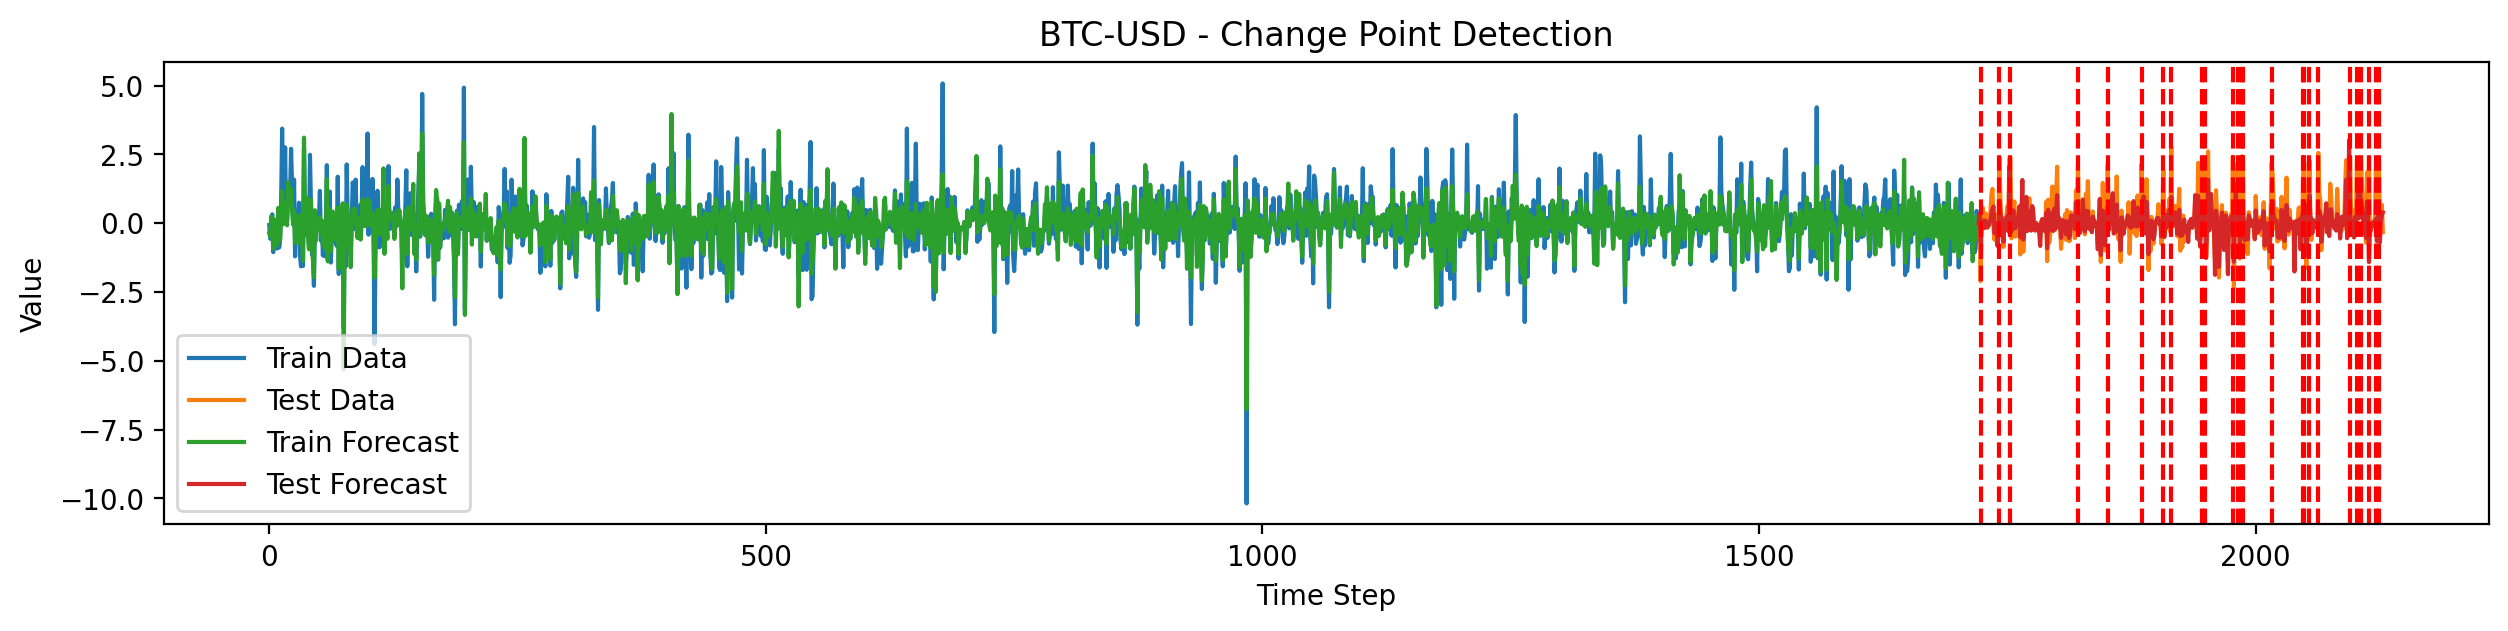

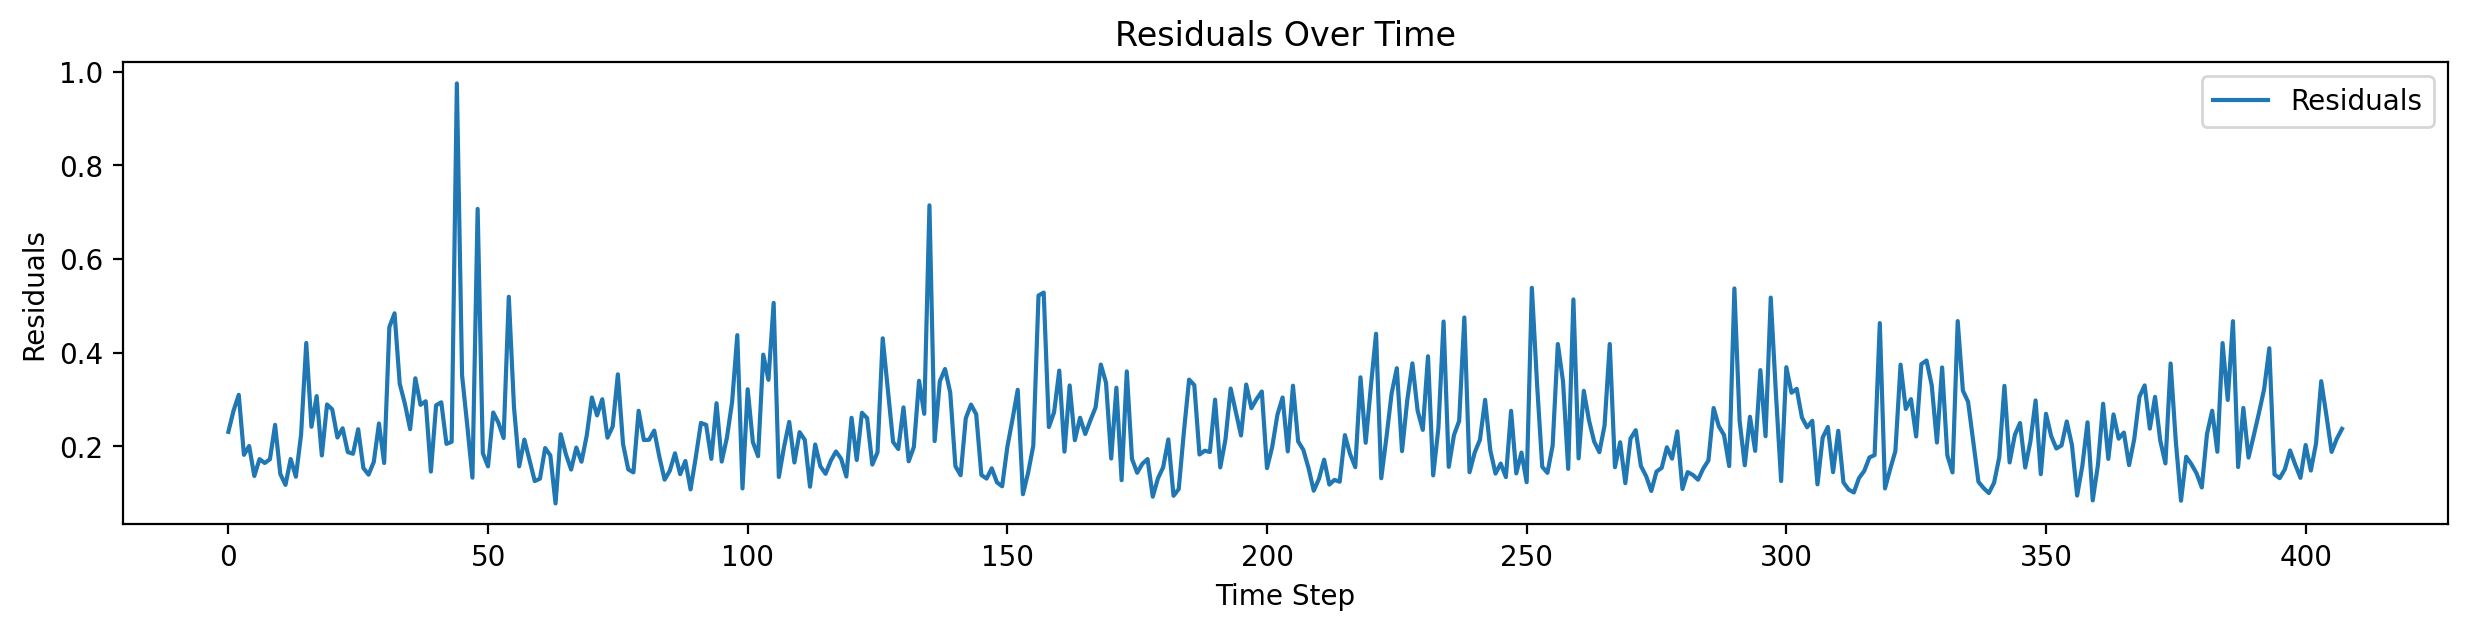

In [149]:
detector = ChangePointDetector('returns_crypto.csv', 'graphs_cor_', 'graph_prefix', graph_type='correlation')
detector.train_model()
change_points, residuals_list = detector.detect_change_points()
detector.plot_individual_series(change_points, 'BTC-USD')
detector.plot_residuals(residuals_list, change_points)

**Как видим на основе выбранных параметрах модели кол-во детектированных точек разладки больше для графа, который построен на основе энтропии**

**Граф на основе симуляцилнных данных**

In [12]:
sunth_data = pd.read_csv('all_synthetic_returns_series.csv').iloc[:,1:].dropna().reset_index(drop=True)
sunth_data.head()

Date   BTC-USD   ETH-USD  USDT-USD   BNB-USD   XRP-USD  DOGE-USD  \
0  2018-06-12 -0.046991 -0.068333 -0.001158 -0.010225 -0.068094 -0.044836   
1  2018-06-13 -0.035316 -0.038944  0.002758 -0.041842 -0.050219 -0.088054   
2  2018-06-14  0.051253  0.088479  0.000418  0.020988  0.049831  0.045083   
3  2018-06-15 -0.032773 -0.055293  0.002988  0.010258 -0.042043 -0.014606   
4  2018-06-16  0.014494  0.017593 -0.002691  0.050578 -0.005436 -0.002068   

    ADA-USD   TRX-USD      LINK-USD  ...   RVN-USD  TRAC-USD    SC-USD  \
0 -0.081062 -0.099265     -0.130579  ... -0.053122 -0.116799 -0.109805   
1 -0.037080 -0.055682     -0.061714  ... -0.112291 -0.096486 -0.060820   
2  0.074603  0.093516     -1.000199  ...  0.204884  0.246639  0.170375   
3 -0.055855 -0.056080 -13162.371496  ... -0.011350 -0.051877 -0.079005   
4  0.001321  0.008048     -1.042895  ... -0.025871  0.011107 -0.017341   

    ELF-USD  QTUM-USD   BAT-USD   LRC-USD  DASH-USD   DCR-USD   GAS-USD  
0 -0.121305 -0.057361 -0.108823 -0.126726 -0.039344 -0.092243 -0.050426  
1 -0.047805 -0.056788 -0.063299 -0.032789 -0.058051 -0.002946 -0.068313  
2  0.045171  0.048935  0.125883  0.079084  0.090922  0.148690  0.083088  
3 -0.012008 -0.042384  0.074454 -0.051358 -0.038249 -0.082695 -0.073652  
4  0.033364  0.007297  0.024911  0.042775  0.031450 -0.008604  0.016690  

[5 rows x 48 columns]

Training Model:   2%|▏         | 1/50 [00:00<00:39,  1.26it/s]

Epoch 000, Loss: 0.4079


Training Model:   4%|▍         | 2/50 [00:01<00:35,  1.34it/s]

Epoch 001, Loss: 0.4020


Training Model:   6%|▌         | 3/50 [00:02<00:33,  1.38it/s]

Epoch 002, Loss: 0.4019


Training Model:   8%|▊         | 4/50 [00:02<00:32,  1.41it/s]

Epoch 003, Loss: 0.4016


Training Model:  10%|█         | 5/50 [00:03<00:31,  1.42it/s]

Epoch 004, Loss: 0.4012


Training Model:  12%|█▏        | 6/50 [00:04<00:30,  1.42it/s]

Epoch 005, Loss: 0.4010


Training Model:  14%|█▍        | 7/50 [00:04<00:30,  1.42it/s]

Epoch 006, Loss: 0.4009


Training Model:  16%|█▌        | 8/50 [00:05<00:30,  1.39it/s]

Epoch 007, Loss: 0.4009


Training Model:  18%|█▊        | 9/50 [00:06<00:29,  1.39it/s]

Epoch 008, Loss: 0.4007


Training Model:  20%|██        | 10/50 [00:07<00:28,  1.40it/s]

Epoch 009, Loss: 0.4004


Training Model:  22%|██▏       | 11/50 [00:07<00:28,  1.39it/s]

Epoch 010, Loss: 0.4002


Training Model:  24%|██▍       | 12/50 [00:08<00:27,  1.38it/s]

Epoch 011, Loss: 0.4000


Training Model:  26%|██▌       | 13/50 [00:09<00:26,  1.39it/s]

Epoch 012, Loss: 0.3999


Training Model:  28%|██▊       | 14/50 [00:10<00:26,  1.38it/s]

Epoch 013, Loss: 0.3999


Training Model:  30%|███       | 15/50 [00:10<00:25,  1.37it/s]

Epoch 014, Loss: 0.3999


Training Model:  32%|███▏      | 16/50 [00:11<00:25,  1.35it/s]

Epoch 015, Loss: 0.3999


Training Model:  34%|███▍      | 17/50 [00:12<00:23,  1.38it/s]

Epoch 016, Loss: 0.3999


Training Model:  36%|███▌      | 18/50 [00:12<00:23,  1.38it/s]

Epoch 017, Loss: 0.3999


Training Model:  38%|███▊      | 19/50 [00:13<00:23,  1.34it/s]

Epoch 018, Loss: 0.3999


Training Model:  40%|████      | 20/50 [00:14<00:22,  1.36it/s]

Epoch 019, Loss: 0.3999


Training Model:  42%|████▏     | 21/50 [00:15<00:21,  1.34it/s]

Epoch 020, Loss: 0.3999


Training Model:  44%|████▍     | 22/50 [00:16<00:20,  1.33it/s]

Epoch 021, Loss: 0.3999


Training Model:  46%|████▌     | 23/50 [00:16<00:20,  1.34it/s]

Epoch 022, Loss: 0.3999


Training Model:  48%|████▊     | 24/50 [00:17<00:19,  1.36it/s]

Epoch 023, Loss: 0.3999


Training Model:  50%|█████     | 25/50 [00:18<00:17,  1.39it/s]

Epoch 024, Loss: 0.3999


Training Model:  52%|█████▏    | 26/50 [00:18<00:17,  1.40it/s]

Epoch 025, Loss: 0.3999


Training Model:  54%|█████▍    | 27/50 [00:19<00:16,  1.39it/s]

Epoch 026, Loss: 0.3999


Training Model:  56%|█████▌    | 28/50 [00:20<00:15,  1.40it/s]

Epoch 027, Loss: 0.3999


Training Model:  58%|█████▊    | 29/50 [00:20<00:14,  1.42it/s]

Epoch 028, Loss: 0.3999


Training Model:  60%|██████    | 30/50 [00:21<00:14,  1.43it/s]

Epoch 029, Loss: 0.3999


Training Model:  62%|██████▏   | 31/50 [00:22<00:13,  1.43it/s]

Epoch 030, Loss: 0.3999


Training Model:  64%|██████▍   | 32/50 [00:23<00:12,  1.45it/s]

Epoch 031, Loss: 0.3999


Training Model:  66%|██████▌   | 33/50 [00:23<00:11,  1.45it/s]

Epoch 032, Loss: 0.3999


Training Model:  68%|██████▊   | 34/50 [00:24<00:11,  1.45it/s]

Epoch 033, Loss: 0.3999


Training Model:  70%|███████   | 35/50 [00:25<00:10,  1.44it/s]

Epoch 034, Loss: 0.3999


Training Model:  72%|███████▏  | 36/50 [00:25<00:09,  1.44it/s]

Epoch 035, Loss: 0.3999


Training Model:  74%|███████▍  | 37/50 [00:26<00:09,  1.44it/s]

Epoch 036, Loss: 0.3999


Training Model:  76%|███████▌  | 38/50 [00:27<00:08,  1.41it/s]

Epoch 037, Loss: 0.3999


Training Model:  78%|███████▊  | 39/50 [00:27<00:07,  1.40it/s]

Epoch 038, Loss: 0.3999


Training Model:  80%|████████  | 40/50 [00:28<00:07,  1.37it/s]

Epoch 039, Loss: 0.3999


Training Model:  82%|████████▏ | 41/50 [00:29<00:06,  1.39it/s]

Epoch 040, Loss: 0.3999


Training Model:  84%|████████▍ | 42/50 [00:30<00:05,  1.40it/s]

Epoch 041, Loss: 0.3999


Training Model:  86%|████████▌ | 43/50 [00:30<00:05,  1.40it/s]

Epoch 042, Loss: 0.3999


Training Model:  88%|████████▊ | 44/50 [00:31<00:04,  1.39it/s]

Epoch 043, Loss: 0.3999


Training Model:  90%|█████████ | 45/50 [00:32<00:03,  1.39it/s]

Epoch 044, Loss: 0.3999


Training Model:  92%|█████████▏| 46/50 [00:33<00:02,  1.38it/s]

Epoch 045, Loss: 0.3999


Training Model:  94%|█████████▍| 47/50 [00:33<00:02,  1.38it/s]

Epoch 046, Loss: 0.3999


Training Model:  96%|█████████▌| 48/50 [00:34<00:01,  1.36it/s]

Epoch 047, Loss: 0.3999


Training Model:  98%|█████████▊| 49/50 [00:35<00:00,  1.36it/s]

Epoch 048, Loss: 0.3999


Training Model: 100%|██████████| 50/50 [00:35<00:00,  1.39it/s]

Epoch 049, Loss: 0.3999


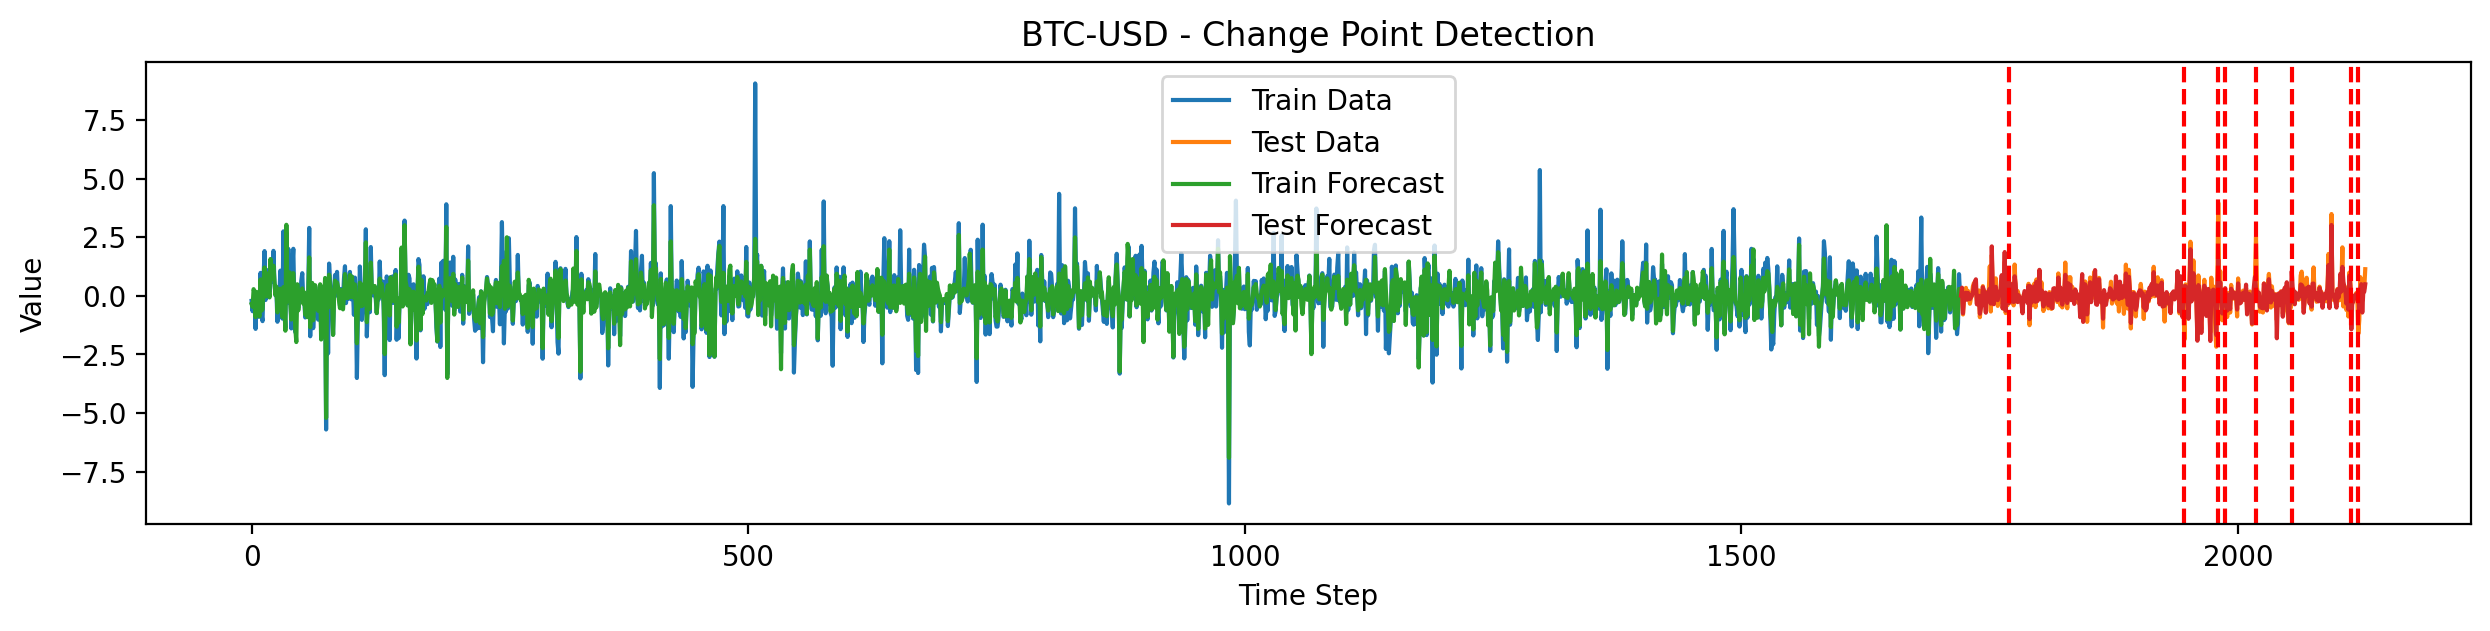

TypeError: ChangePointDetector.plot_residuals() missing 1 required positional argument: 'change_points'

In [13]:
detector = ChangePointDetector('all_synthetic_returns_series.csv','graphs_cor_', 'graph_prefix', graph_type='graphs_entropy_synth')
detector.train_model()
change_points, residuals_list = detector.detect_change_points()
detector.plot_individual_series(change_points, 'BTC-USD')
detector.plot_residuals(residuals_list)

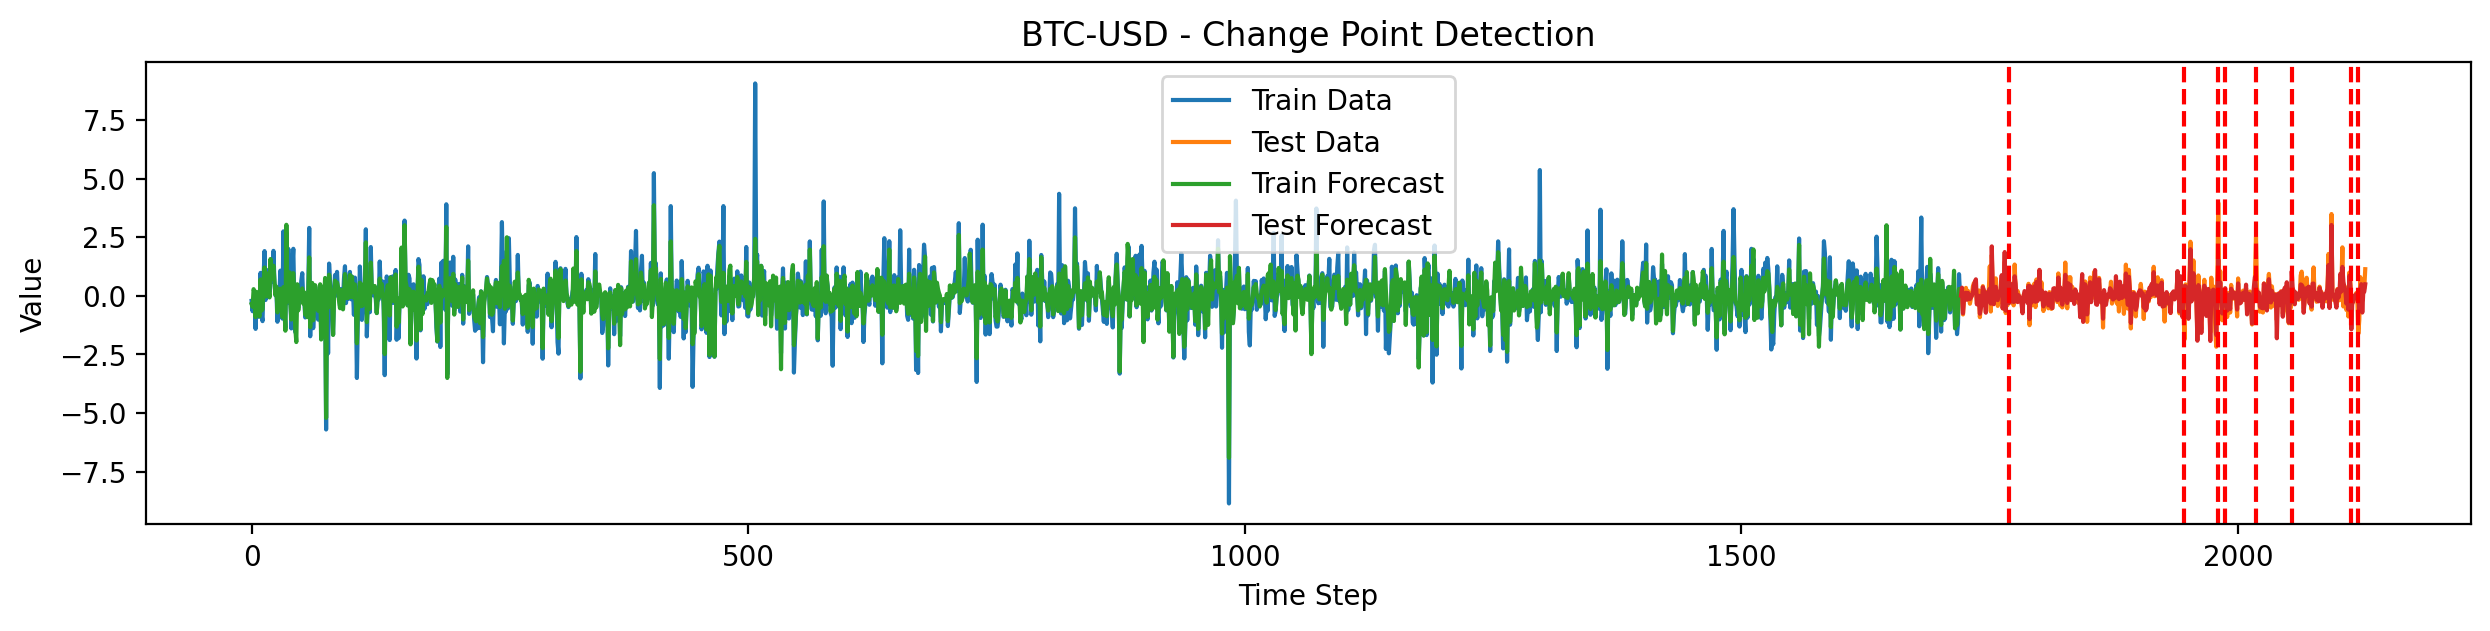

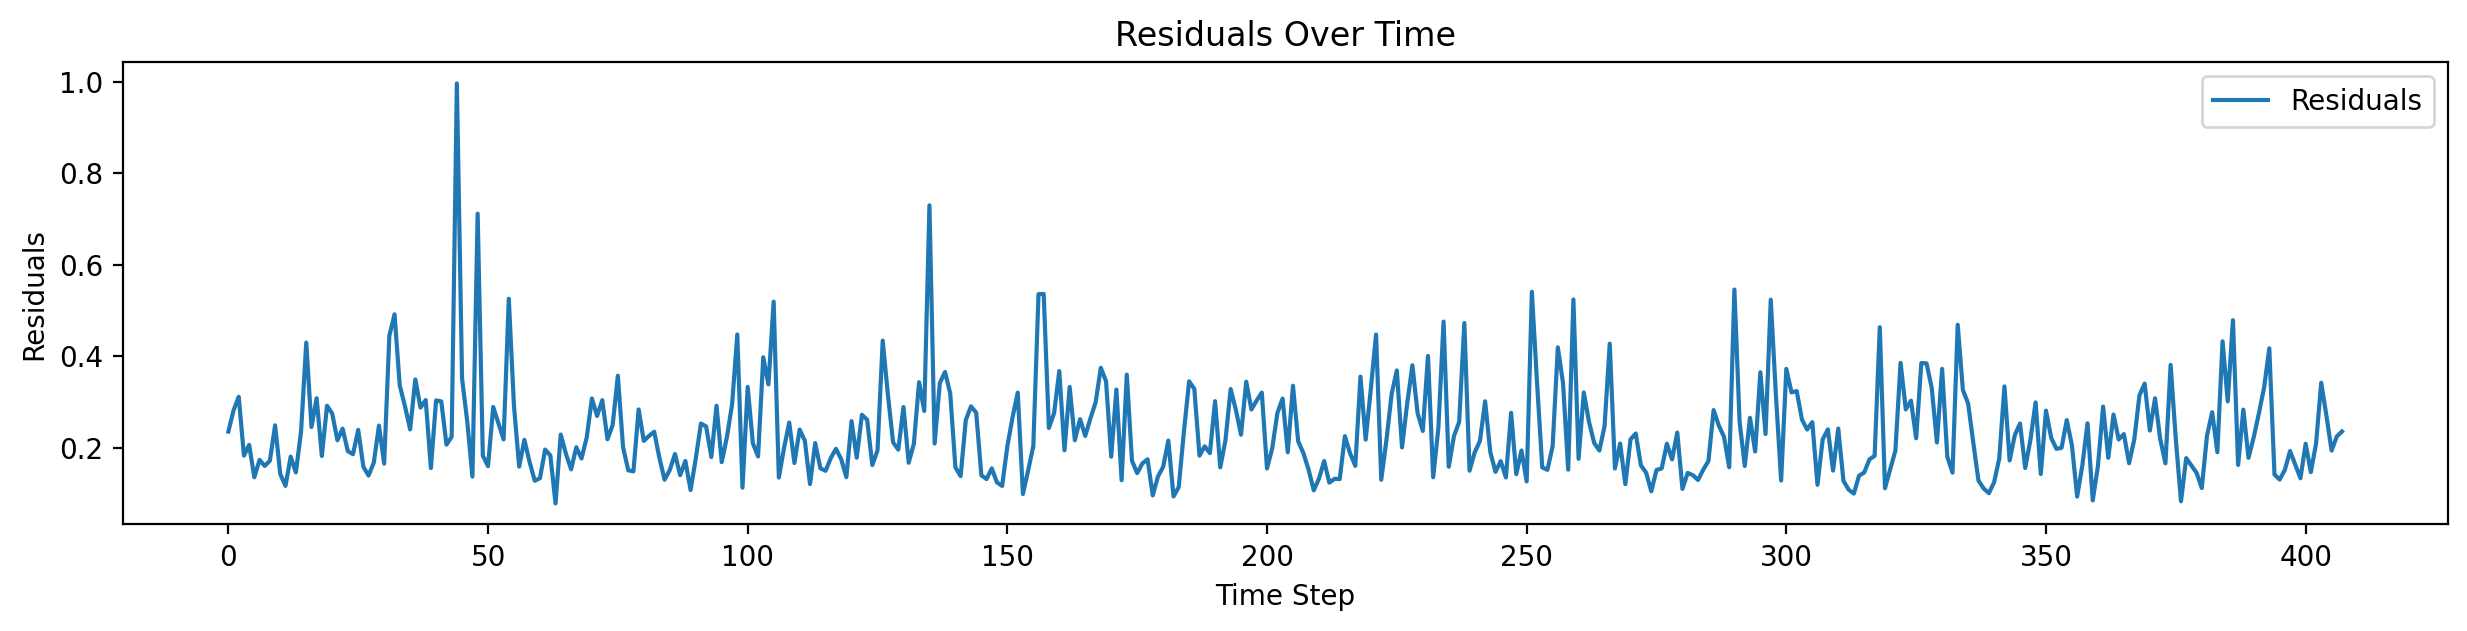

In [14]:
detector.plot_individual_series(change_points, 'BTC-USD')
detector.plot_residuals(residuals_list,change_points)

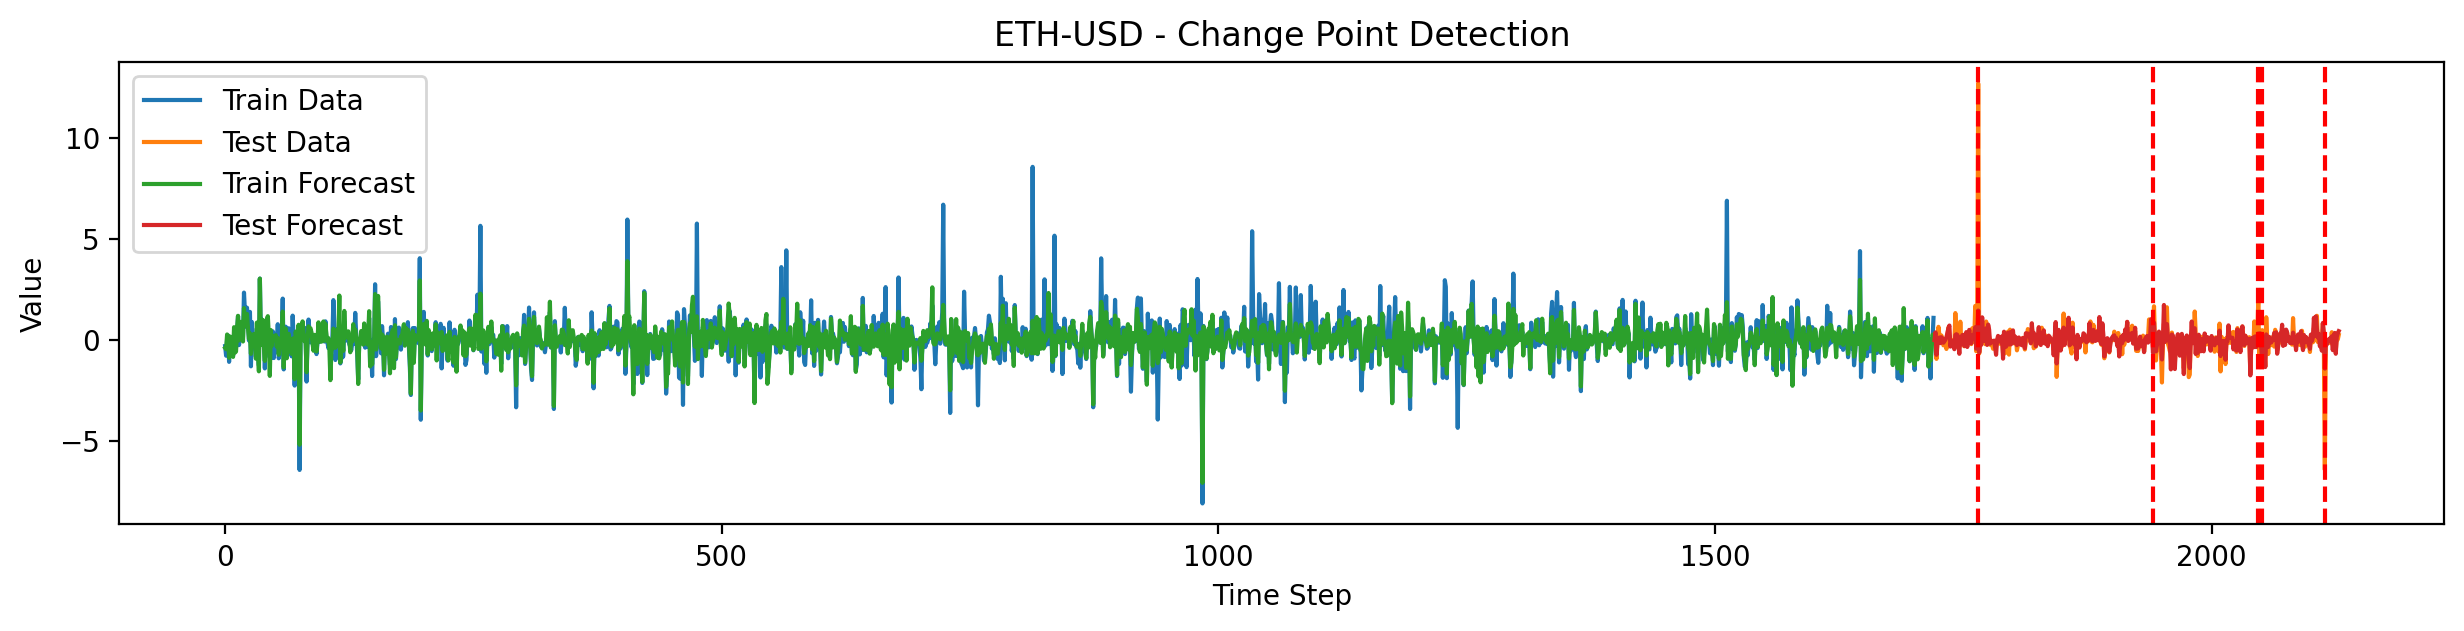

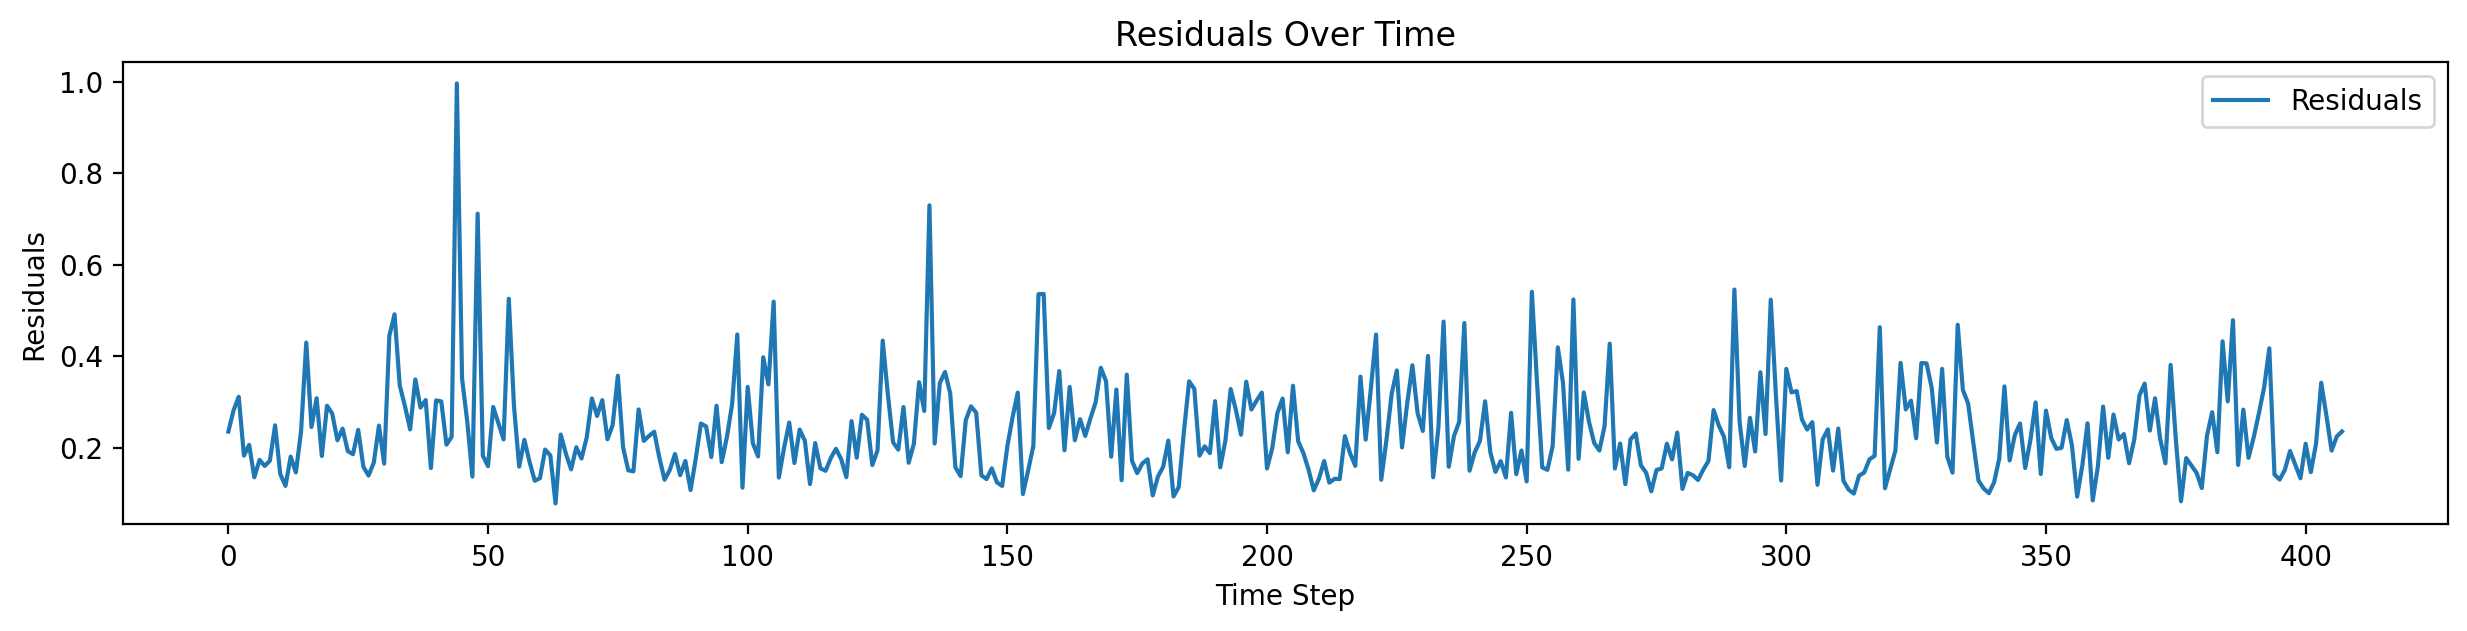

In [15]:
detector.plot_individual_series(change_points, 'ETH-USD')
detector.plot_residuals(residuals_list,change_points)

In [19]:
all_change_points = pd.read_csv('all_change_points.csv').iloc[:,1:]
all_change_points.head()

Date  BTC-USD  ETH-USD  USDT-USD  BNB-USD  XRP-USD  DOGE-USD  \
0  2018-06-11      0.0      0.0       0.0      0.0      0.0       0.0   
1  2018-06-12      0.0      0.0       0.0      0.0      0.0       0.0   
2  2018-06-13      0.0      0.0       0.0      0.0      0.0       0.0   
3  2018-06-14      0.0      0.0       0.0      0.0      0.0       0.0   
4  2018-06-15      0.0      0.0       0.0      0.0      0.0       0.0   

   ADA-USD  TRX-USD  LINK-USD  ...  RVN-USD  TRAC-USD  SC-USD  ELF-USD  \
0      0.0      0.0       0.0  ...      0.0       0.0     0.0      0.0   
1      0.0      0.0       0.0  ...      0.0       0.0     0.0      0.0   
2      0.0      0.0       0.0  ...      0.0       0.0     0.0      0.0   
3      0.0      0.0       1.0  ...      0.0       0.0     0.0      0.0   
4      0.0      0.0       0.0  ...      0.0       0.0     0.0      0.0   

   QTUM-USD  BAT-USD  LRC-USD  DASH-USD  DCR-USD  GAS-USD  
0       0.0      0.0      0.0       0.0      0.0      0.0  
1       0.0      0.0      0.0       0.0      0.0      1.0  
2       0.0      0.0      0.0       0.0      0.0      0.0  
3       0.0      0.0      0.0       0.0      0.0      0.0  
4       0.0      0.0      0.0       0.0      0.0      0.0  

[5 rows x 48 columns]

<Axes: >

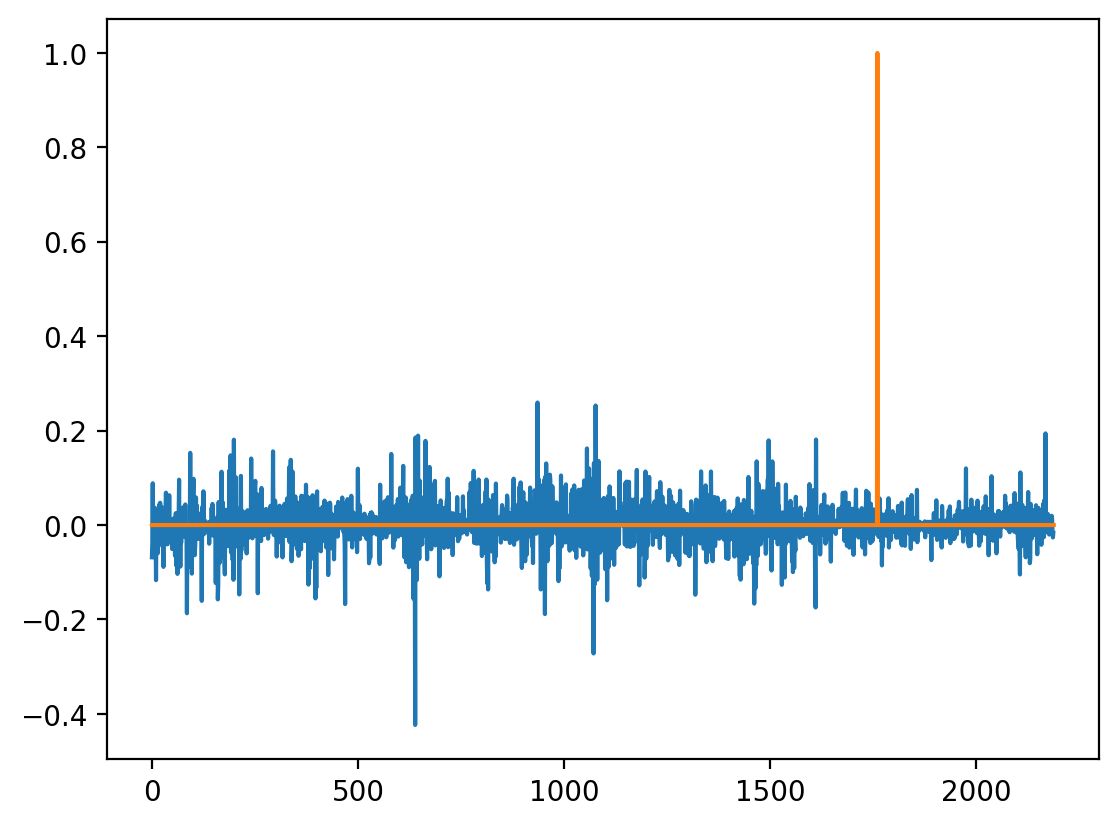

In [21]:
sunth_data['ETH-USD'].plot()
all_change_points['ETH-USD'].plot()

In [ ]:
sunth_data['ETH-USD'].plot()
all_change_points['ETH-USD'].plot()

In [45]:
import numpy as np
import pandas as pd
import networkx as nx
import torch
import torch.nn.functional as F
from torch_geometric.data import HeteroData
from torch_geometric.nn import GCNConv, HeteroConv
from torch_geometric.utils import from_networkx
import matplotlib.pyplot as plt
import random
from tqdm import tqdm
import pickle
import os
from PyIF import te_compute as te
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

class ChangePointDetector:
    def __init__(self, file_path, graph_path, graph_prefix, graph_type='correlation'):
        self.file_path = file_path
        self.graph_path = graph_path
        self.graph_prefix = graph_prefix
        self.graph_type = graph_type
        self.model = None
        self.optimizer = None
        self.num_epochs = 50
        self.hidden_channels = 16
        self.lr = 0.01
        self.window_size = 30
        self.split_ratio = 0.8

        self.data = self.load_real_data(self.file_path)
        self.train_data, self.test_data = self.split_data(self.data)
        self.normalized_train_data, self.mean, self.std = self.normalize_data(self.train_data)
        self.normalized_test_data = self.apply_normalization(self.test_data, self.mean, self.std)

        # Проверка наличия директории и графов, если нет, создание графов
        if not os.path.exists(self.graph_path) or not os.listdir(self.graph_path):
            os.makedirs(self.graph_path, exist_ok=True)
            if self.graph_type == 'correlation':
                self.create_and_save_graphs(self.normalized_train_data, 'train_')
                self.create_and_save_graphs(self.normalized_test_data, 'test_')
            elif self.graph_type == 'entropy':
                self.create_and_save_te_graphs(self.normalized_train_data, 'train_')
                self.create_and_save_te_graphs(self.normalized_test_data, 'test_')

        self.train_graphs = self.load_graphs(self.graph_path, 'train_' + self.graph_prefix)
        self.test_graphs = self.load_graphs(self.graph_path, 'test_' + self.graph_prefix)

        # Конвертируем графы в HeteroData
        self.train_hetero_graphs = self.convert_graphs_to_hetero_data(self.train_graphs)
        self.test_hetero_graphs = self.convert_graphs_to_hetero_data(self.test_graphs)

        if self.train_hetero_graphs:
            input_channels = self.train_hetero_graphs[0]['asset'].x.size(1)
            self.model = HeteroGNN(input_channels, self.hidden_channels)
            self.optimizer = torch.optim.Adam(self.model.parameters(), lr=self.lr)
        else:
            print("No training data available.")

    def load_real_data(self, file_path):
        df = pd.read_csv(file_path)
        data = df.drop(columns=['Date']).values.T
        self.asset_names = df.columns[1:].tolist()
        return data

    def normalize_data(self, data):
        mean = np.mean(data, axis=1, keepdims=True)
        std = np.std(data, axis=1, keepdims=True)
        normalized_data = (data - mean) / std
        return normalized_data, mean, std

    def apply_normalization(self, data, mean, std):
        return (data - mean) / std

    def split_data(self, data):
        split_point = int(self.split_ratio * data.shape[1])
        return data[:, :split_point], data[:, split_point:]

    def create_and_save_graphs(self, data, prefix):
        num_nodes = data.shape[0]
        for t in range(self.window_size, data.shape[1]):
            window_data = data[:, t-self.window_size:t]
            corr_matrix = np.corrcoef(window_data)
            G = nx.Graph()
            for i in range(num_nodes):
                for j in range(i+1, num_nodes):
                    if corr_matrix[i, j] > 0.5:
                        G.add_edge(i, j, weight=corr_matrix[i, j])
            for i in range(num_nodes):
                if not G.has_node(i):
                    G.add_node(i)
                G.nodes[i]['x'] = [data[i, t]]
            with open(os.path.join(self.graph_path, f'{prefix}{self.graph_prefix}_{t}.pkl'), 'wb') as f:
                pickle.dump(G, f)

    def create_and_save_te_graphs(self, data, prefix, threshold=0.01):
        num_nodes = data.shape[0]
        for t in tqdm(range(self.window_size, data.shape[1]), desc="Creating TE graphs"):
            window_data = data[:, t-self.window_size:t]
            G = nx.Graph()
            for i in range(num_nodes):
                for j in range(num_nodes):
                    if i != j:
                        te_value = self.compute_transfer_entropy(window_data[i], window_data[j])
                        if te_value > threshold:
                            G.add_edge(i, j, weight=te_value)
            for i in range(num_nodes):
                if not G.has_node(i):
                    G.add_node(i)
                G.nodes[i]['x'] = [data[i, t]]
            with open(os.path.join(self.graph_path, f'{prefix}{self.graph_prefix}_{t}.pkl'), 'wb') as f:
                pickle.dump(G, f)

    def compute_transfer_entropy(self, source, target, k=1, embedding=1, safetyCheck=True, GPU=False):
        te_value = te.te_compute(source, target, k=k, embedding=embedding, safetyCheck=safetyCheck, GPU=GPU)
        return te_value

    def load_graphs(self, path, prefix):
        graphs = {}
        for file in os.listdir(path):
            if file.startswith(prefix) and file.endswith('.pkl'):
                date = file.split('_')[-1].replace('.pkl', '')
                with open(os.path.join(path, file), 'rb') as f:
                    graphs[date] = pickle.load(f)
        return graphs

    def convert_graphs_to_hetero_data(self, graphs):
        hetero_data_list = []
        for date, G in graphs.items():
            data = from_networkx(G, group_node_attrs=['x'])
            if 'x' not in data:
                print(f"No node features 'x' found in graph for date {date}")
                continue
            hetero_data = HeteroData()
            hetero_data['asset'].x = data['x'].float()
            hetero_data['asset', 'correlates_with', 'asset'].edge_index = data.edge_index
            hetero_data_list.append(hetero_data)
        return hetero_data_list

    def train_model(self):
        self.model.train()
        for epoch in tqdm(range(self.num_epochs), desc="Training Model"):
            epoch_loss = 0
            for graph in self.train_hetero_graphs:
                self.optimizer.zero_grad()
                out = self.model(graph)
                loss = F.mse_loss(out, graph['asset'].x)
                loss.backward()
                self.optimizer.step()
                epoch_loss += loss.item()
            epoch_loss /= len(self.train_hetero_graphs)
            print(f'Epoch {epoch:03d}, Loss: {epoch_loss:.4f}')

    def detect_change_points(self):
        self.model.eval()
        residuals_list = []
        change_points = {i: [] for i in range(self.test_hetero_graphs[0]['asset'].x.size(0))}
        detection_times = {i: [] for i in range(self.test_hetero_graphs[0]['asset'].x.size(0))}

        with torch.no_grad():
            for idx, graph in enumerate(self.test_hetero_graphs):
                node_embeddings = self.model(graph).detach().cpu().numpy()
                original_data = graph['asset'].x.cpu().numpy()

                residuals = np.abs(node_embeddings - original_data)
                residuals_mean = np.mean(residuals, axis=1)
                residuals_list.append(residuals_mean)

        residuals_mean_all = np.concatenate(residuals_list)
        global_median = np.median(residuals_mean_all)
        global_std = np.std(residuals_mean_all)

        for idx, residuals_mean in enumerate(residuals_list):
            for i in range(residuals_mean.shape[0]):
                if residuals_mean[i] > global_median + 3 * global_std:
                    change_points[i].append(idx)
                    detection_times[i].append(idx)

        return change_points, np.array(residuals_list), detection_times

    def plot_individual_series(self, change_points, asset_name):
        asset_index = self.asset_names.index(asset_name)
        
        train_values = np.concatenate([graph['asset'].x.cpu().numpy()[asset_index] for graph in self.train_hetero_graphs])
        test_values = np.concatenate([graph['asset'].x.cpu().numpy()[asset_index] for graph in self.test_hetero_graphs])
        forecast_values_train = np.concatenate([self.model(graph).detach().cpu().numpy()[asset_index] for graph in self.train_hetero_graphs])
        forecast_values_test = np.concatenate([self.model(graph).detach().cpu().numpy()[asset_index] for graph in self.test_hetero_graphs])
        
        plt.figure(figsize=(15, 3))
        plt.plot(range(len(train_values)), train_values, label='Train Data')
        plt.plot(range(len(train_values), len(train_values) + len(test_values)), test_values, label='Test Data')
        plt.plot(range(len(forecast_values_train)), forecast_values_train, label='Train Forecast')
        plt.plot(range(len(train_values), len(train_values) + len(forecast_values_test)), forecast_values_test, label='Test Forecast')

        for cp in change_points[asset_index]:
            plt.axvline(x=len(train_values) + cp, color='r', linestyle='--')
        
        plt.xlabel('Time Step')
        plt.ylabel('Value')
        plt.title(f'{asset_name} - Change Point Detection')
        plt.legend()
        plt.show()

    def plot_residuals(self, residuals_list, change_points):
        plt.figure(figsize=(15, 3))
        plt.plot(np.arange(len(residuals_list)), np.mean(residuals_list, axis=1), label='Residuals')
        for cp in change_points:
            plt.axvline(x=cp, color='r', linestyle='--')
        plt.xlabel('Time Step')
        plt.ylabel('Residuals')
        plt.title('Residuals Over Time')
        plt.legend()
        plt.show()

    def random_search(self, param_grid, n_iter=10):
        best_loss = float('inf')
        best_params = None

        for _ in range(n_iter):
            params = {key: random.choice(values) for key, values in param_grid.items()}
            self.hidden_channels = params['hidden_channels']
            self.lr = params['lr']
            self.num_epochs = params['num_epochs']

            self.train_model()
            change_points, residuals_list = self.detect_change_points()
            val_loss = self.evaluate_model()

            if val_loss < best_loss:
                best_loss = val_loss
                best_params = params

        return best_params, best_loss

    def evaluate_model(self):
        residuals_list = []
        self.model.eval()
        with torch.no_grad():
            for graph in self.train_hetero_graphs:
                node_embeddings = self.model(graph).detach().cpu().numpy()
                original_data = graph['asset'].x.detach().cpu().numpy()
                residuals = np.abs(node_embeddings - original_data)
                residuals_mean = np.mean(residuals, axis=1)
                residuals_list.append(residuals_mean)
        residuals_mean_all = np.concatenate(residuals_list)
        return np.mean(residuals_mean_all)

    def calculate_detection_metrics(self, true_change_points, detected_change_points):
        ADD = []
        FDD = []

        for asset_index in true_change_points.keys():
            true_cps = true_change_points[asset_index]
            detected_cps = detected_change_points[asset_index]

            # Calculate ADD
            for true_cp in true_cps:
                delays = [detected_cp - true_cp for detected_cp in detected_cps if detected_cp >= true_cp]
                if delays:
                    ADD.append(min(delays))

            # Calculate FDD
            false_alarms = [cp for cp in detected_cps if cp not in true_cps]
            if len(false_alarms) > 1:
                intervals = [false_alarms[i+1] - false_alarms[i] for i in range(len(false_alarms) - 1)]
                FDD.extend(intervals)

        mean_ADD = np.mean(ADD) if ADD else float('inf')
        mean_FDD = np.mean(FDD) if FDD else float('inf')

        return mean_ADD, mean_FDD

    def calculate_prediction_metrics(self, true_change_points, detected_change_points):
        precision_list = []
        recall_list = []
        f1_list = []
    
        for i in range(len(self.asset_names)):
            true_cps = true_change_points.get(i, [])
            detected_cps = detected_change_points.get(i, [])
    
            max_len = max(max(true_cps, default=0), max(detected_cps, default=0)) + 1
            true_labels = [0] * max_len
            pred_labels = [0] * max_len
    
            for cp in map(int, true_cps):  # Преобразование в целые числа
                true_labels[cp] = 1
    
            for cp in map(int, detected_cps):  # Преобразование в целые числа
                pred_labels[cp] = 1
    
            precision = precision_score(true_labels, pred_labels)
            recall = recall_score(true_labels, pred_labels)
            f1 = f1_score(true_labels, pred_labels)
    
            precision_list.append(precision)
            recall_list.append(recall)
            f1_list.append(f1)
    
        mean_precision = np.mean(precision_list)
        mean_recall = np.mean(recall_list)
        mean_f1 = np.mean(f1_list)
    
        return mean_precision, mean_recall, mean_f1

    def calculate_prediction_metrics_series(self):
        train_true = []
        train_pred = []
        for graph in self.train_hetero_graphs:
            node_embeddings = self.model(graph).detach().cpu().numpy()
            original_data = graph['asset'].x.detach().cpu().numpy()
            train_true.extend(original_data.flatten())
            train_pred.extend(node_embeddings.flatten())

        test_true = []
        test_pred = []
        for graph in self.test_hetero_graphs:
            node_embeddings = self.model(graph).detach().cpu().numpy()
            original_data = graph['asset'].x.detach().cpu().numpy()
            test_true.extend(original_data.flatten())
            test_pred.extend(node_embeddings.flatten())

        train_rmse = np.sqrt(mean_squared_error(train_true, train_pred))
        train_mae = mean_absolute_error(train_true, train_pred)
        train_r2 = r2_score(train_true, train_pred)

        test_rmse = np.sqrt(mean_squared_error(test_true, test_pred))
        test_mae = mean_absolute_error(test_true, test_pred)
        test_r2 = r2_score(test_true, test_pred)

        return {
            'train_rmse': train_rmse,
            'train_mae': train_mae,
            'train_r2': train_r2,
            'test_rmse': test_rmse,
            'test_mae': test_mae,
            'test_r2': test_r2
        }



class HeteroGNN(torch.nn.Module):
    def __init__(self, input_channels, hidden_channels):
        super(HeteroGNN, self).__init__()
        self.conv1 = HeteroConv({
            ('asset', 'correlates_with', 'asset'): GCNConv(input_channels, hidden_channels)
        }, aggr='sum')
        self.conv2 = HeteroConv({
            ('asset', 'correlates_with', 'asset'): GCNConv(hidden_channels, input_channels)
        }, aggr='sum')

    def forward(self, data):
        x_dict = self.conv1(data.x_dict, data.edge_index_dict)
        x_dict = {key: F.relu(x) for key, x in x_dict.items()}
        x_dict = self.conv2(x_dict, data.edge_index_dict)
        return x_dict['asset']


In [46]:
detector = ChangePointDetector('all_synthetic_returns_series.csv','graphs_cor_', 'graph_prefix', graph_type='graphs_entropy_synth')
detector.split_ratio = 0.3 
detector.train_model()
change_points, residuals_list,detection_times = detector.detect_change_points()

metrics = detector.calculate_prediction_metrics_series()
print(metrics)

Training Model:   2%|▏         | 1/50 [00:00<00:35,  1.36it/s]

Epoch 000, Loss: 0.4020


Training Model:   4%|▍         | 2/50 [00:01<00:34,  1.39it/s]

Epoch 001, Loss: 0.4006


Training Model:   6%|▌         | 3/50 [00:02<00:34,  1.38it/s]

Epoch 002, Loss: 0.4007


Training Model:   8%|▊         | 4/50 [00:02<00:32,  1.40it/s]

Epoch 003, Loss: 0.4007


Training Model:  10%|█         | 5/50 [00:03<00:32,  1.40it/s]

Epoch 004, Loss: 0.4007


Training Model:  12%|█▏        | 6/50 [00:04<00:31,  1.41it/s]

Epoch 005, Loss: 0.4004


Training Model:  14%|█▍        | 7/50 [00:05<00:30,  1.39it/s]

Epoch 006, Loss: 0.4002


Training Model:  16%|█▌        | 8/50 [00:05<00:30,  1.39it/s]

Epoch 007, Loss: 0.4000


Training Model:  18%|█▊        | 9/50 [00:06<00:29,  1.40it/s]

Epoch 008, Loss: 0.3999


Training Model:  20%|██        | 10/50 [00:07<00:28,  1.41it/s]

Epoch 009, Loss: 0.3999


Training Model:  22%|██▏       | 11/50 [00:07<00:27,  1.42it/s]

Epoch 010, Loss: 0.3999


Training Model:  24%|██▍       | 12/50 [00:08<00:27,  1.39it/s]

Epoch 011, Loss: 0.3999


Training Model:  26%|██▌       | 13/50 [00:09<00:26,  1.40it/s]

Epoch 012, Loss: 0.3999


Training Model:  28%|██▊       | 14/50 [00:10<00:25,  1.40it/s]

Epoch 013, Loss: 0.3999


Training Model:  30%|███       | 15/50 [00:10<00:25,  1.39it/s]

Epoch 014, Loss: 0.3999


Training Model:  32%|███▏      | 16/50 [00:11<00:24,  1.39it/s]

Epoch 015, Loss: 0.3999


Training Model:  34%|███▍      | 17/50 [00:12<00:23,  1.40it/s]

Epoch 016, Loss: 0.3999


Training Model:  36%|███▌      | 18/50 [00:12<00:23,  1.38it/s]

Epoch 017, Loss: 0.3999


Training Model:  38%|███▊      | 19/50 [00:13<00:22,  1.38it/s]

Epoch 018, Loss: 0.3999


Training Model:  40%|████      | 20/50 [00:14<00:21,  1.39it/s]

Epoch 019, Loss: 0.3999


Training Model:  42%|████▏     | 21/50 [00:15<00:20,  1.39it/s]

Epoch 020, Loss: 0.3999


Training Model:  44%|████▍     | 22/50 [00:15<00:20,  1.38it/s]

Epoch 021, Loss: 0.3999


Training Model:  46%|████▌     | 23/50 [00:16<00:19,  1.38it/s]

Epoch 022, Loss: 0.3999


Training Model:  48%|████▊     | 24/50 [00:17<00:18,  1.37it/s]

Epoch 023, Loss: 0.3999


Training Model:  50%|█████     | 25/50 [00:18<00:19,  1.29it/s]

Epoch 024, Loss: 0.3999


Training Model:  52%|█████▏    | 26/50 [00:18<00:18,  1.32it/s]

Epoch 025, Loss: 0.3999


Training Model:  54%|█████▍    | 27/50 [00:19<00:17,  1.33it/s]

Epoch 026, Loss: 0.3999


Training Model:  56%|█████▌    | 28/50 [00:20<00:16,  1.35it/s]

Epoch 027, Loss: 0.3999


Training Model:  58%|█████▊    | 29/50 [00:21<00:15,  1.36it/s]

Epoch 028, Loss: 0.3999


Training Model:  60%|██████    | 30/50 [00:21<00:14,  1.36it/s]

Epoch 029, Loss: 0.3999


Training Model:  62%|██████▏   | 31/50 [00:22<00:13,  1.36it/s]

Epoch 030, Loss: 0.3999


Training Model:  64%|██████▍   | 32/50 [00:23<00:13,  1.37it/s]

Epoch 031, Loss: 0.3999


Training Model:  66%|██████▌   | 33/50 [00:23<00:12,  1.38it/s]

Epoch 032, Loss: 0.3999


Training Model:  68%|██████▊   | 34/50 [00:24<00:11,  1.37it/s]

Epoch 033, Loss: 0.3999


Training Model:  70%|███████   | 35/50 [00:25<00:10,  1.38it/s]

Epoch 034, Loss: 0.3999


Training Model:  72%|███████▏  | 36/50 [00:26<00:10,  1.37it/s]

Epoch 035, Loss: 0.3999


Training Model:  74%|███████▍  | 37/50 [00:26<00:09,  1.38it/s]

Epoch 036, Loss: 0.3999


Training Model:  76%|███████▌  | 38/50 [00:27<00:08,  1.37it/s]

Epoch 037, Loss: 0.3999


Training Model:  78%|███████▊  | 39/50 [00:28<00:08,  1.37it/s]

Epoch 038, Loss: 0.3999


Training Model:  80%|████████  | 40/50 [00:29<00:07,  1.35it/s]

Epoch 039, Loss: 0.3999


Training Model:  82%|████████▏ | 41/50 [00:29<00:06,  1.38it/s]

Epoch 040, Loss: 0.3999


Training Model:  84%|████████▍ | 42/50 [00:30<00:05,  1.40it/s]

Epoch 041, Loss: 0.3999


Training Model:  86%|████████▌ | 43/50 [00:31<00:04,  1.42it/s]

Epoch 042, Loss: 0.3999


Training Model:  88%|████████▊ | 44/50 [00:31<00:04,  1.44it/s]

Epoch 043, Loss: 0.3999


Training Model:  90%|█████████ | 45/50 [00:32<00:03,  1.45it/s]

Epoch 044, Loss: 0.3999


Training Model:  92%|█████████▏| 46/50 [00:33<00:02,  1.43it/s]

Epoch 045, Loss: 0.3999


Training Model:  94%|█████████▍| 47/50 [00:33<00:02,  1.45it/s]

Epoch 046, Loss: 0.3999


Training Model:  96%|█████████▌| 48/50 [00:34<00:01,  1.46it/s]

Epoch 047, Loss: 0.3999


Training Model:  98%|█████████▊| 49/50 [00:35<00:00,  1.40it/s]

Epoch 048, Loss: 0.3999


Training Model: 100%|██████████| 50/50 [00:36<00:00,  1.39it/s]

Epoch 049, Loss: 0.3999


{'train_rmse': 0.6314267, 'train_mae': 0.35717115, 'train_r2': 0.6001965437365069, 'test_rmse': 0.42671424, 'test_mae': 0.2362892, 'test_r2': 0.6600081120117418}


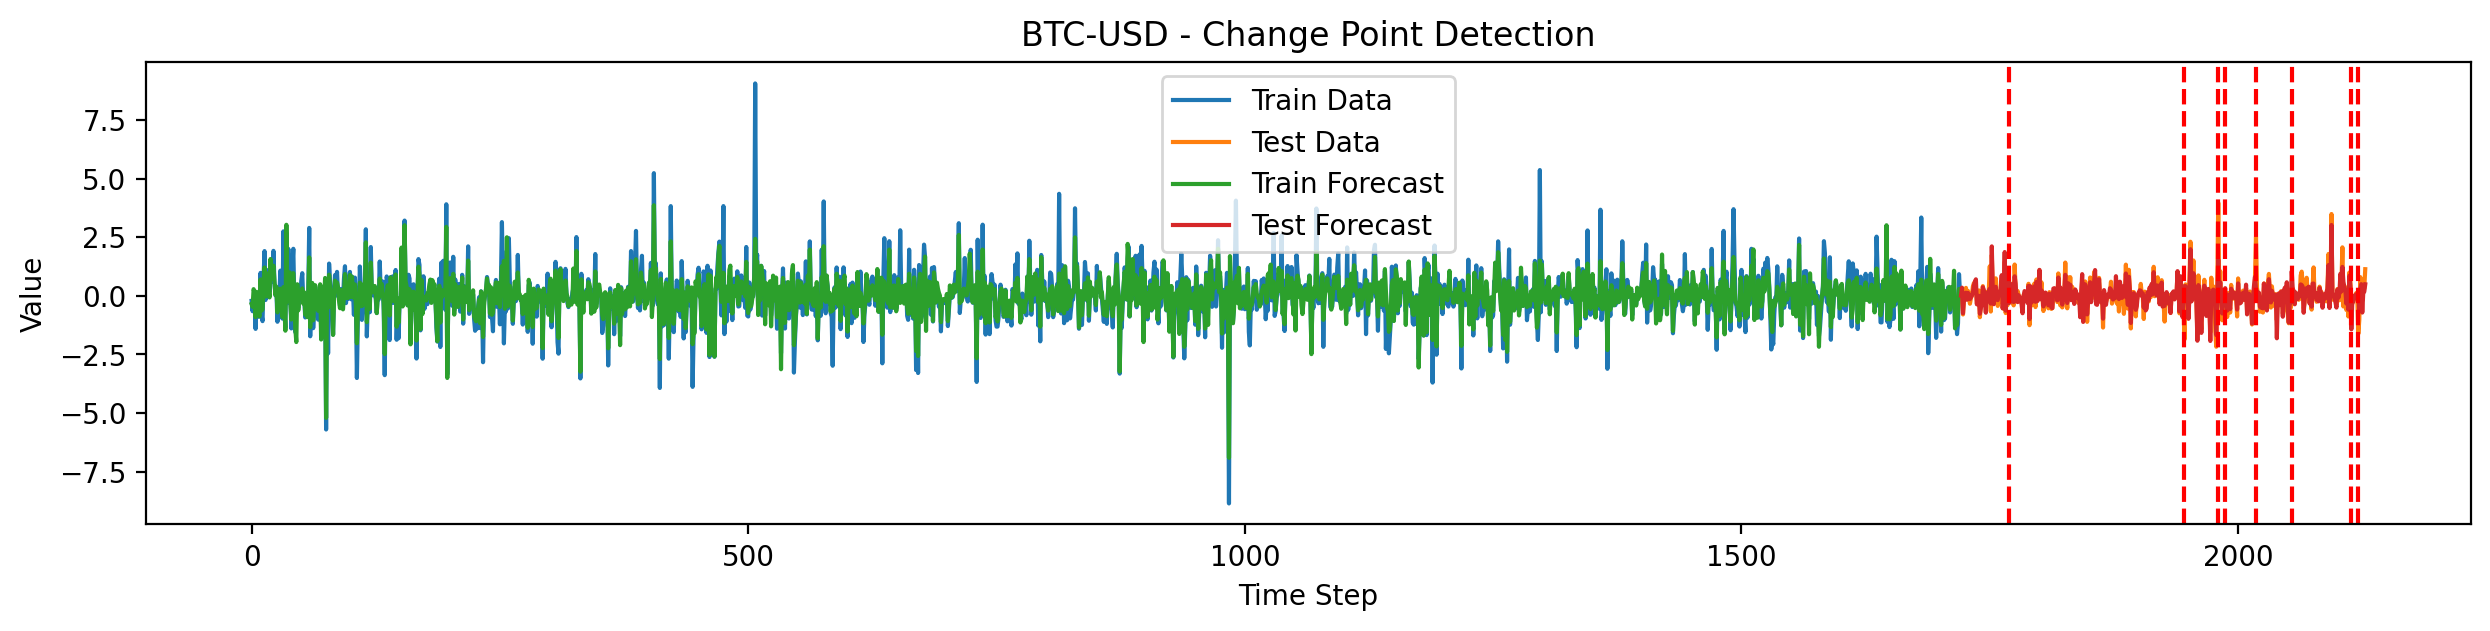

In [47]:
change_points, residuals_list,detection_times = detector.detect_change_points()
detector.plot_individual_series(change_points, 'BTC-USD')

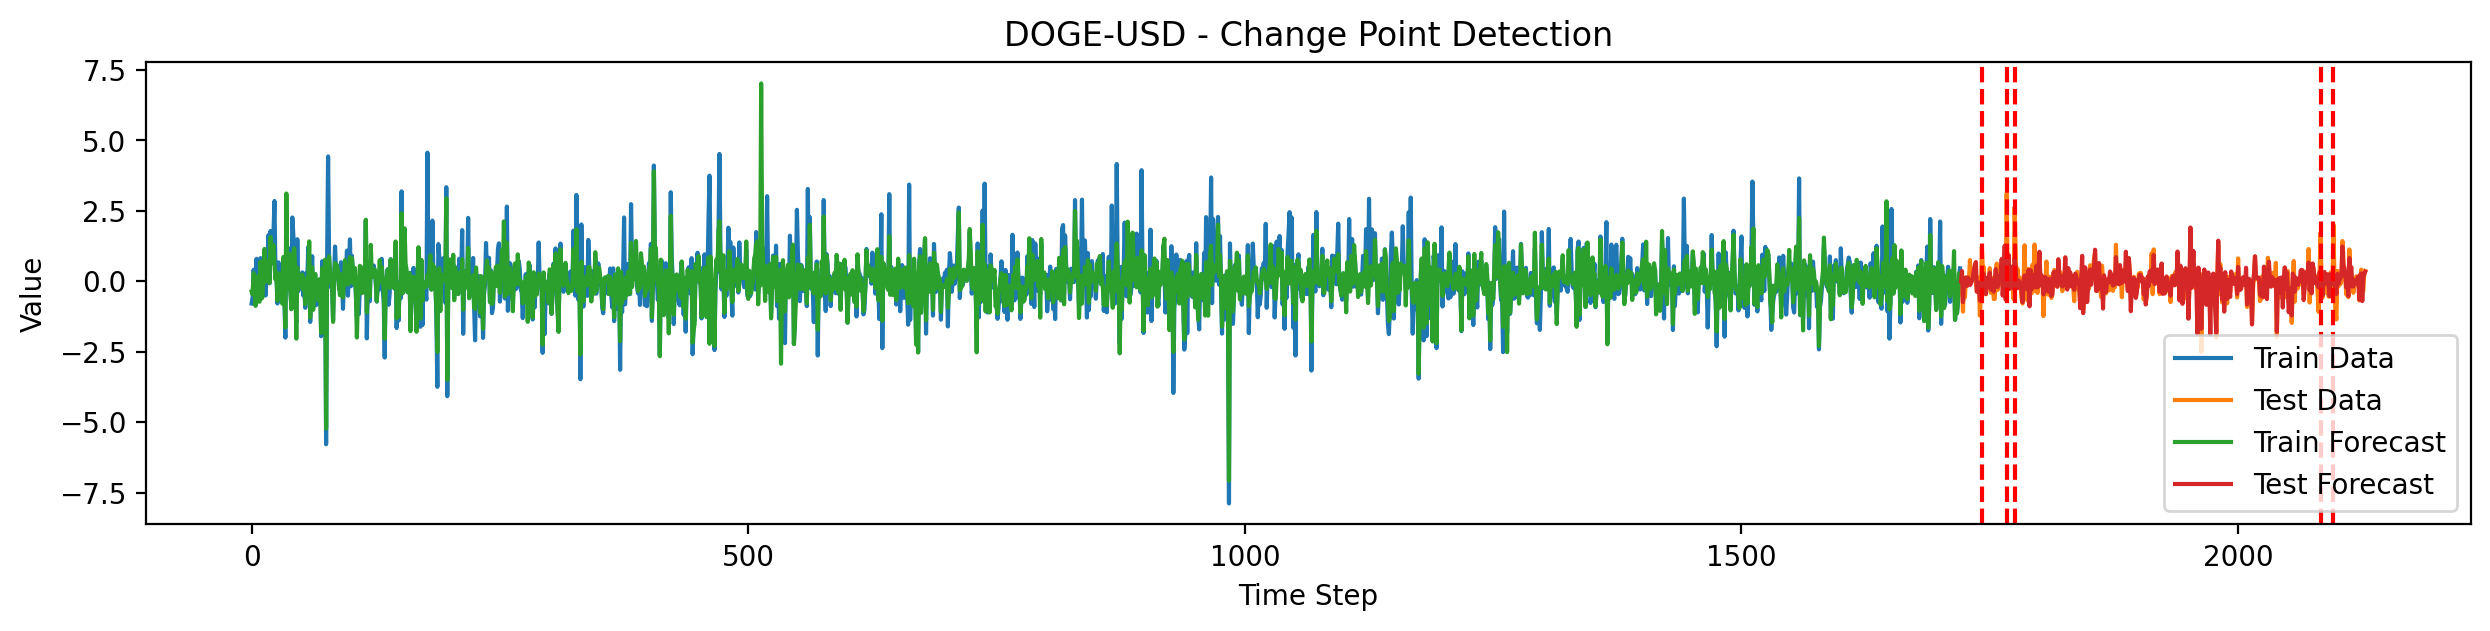

Mean ADD for DOGE-USD: 20.99497716894977, Mean FDD for DOGE-USD: 88.5


In [51]:
# Пример работы с конкретной монетой
asset_name = 'DOGE-USD'
detector.plot_individual_series(change_points, asset_name)

# Загрузка реальных точек разладки для конкретной монеты
true_change_points_df = all_change_points
true_change_points = {detector.asset_names.index(asset_name): true_change_points_df[asset_name].dropna().tolist()}

# Вычисление метрик детекции для конкретной монеты
mean_ADD, mean_FDD = detector.calculate_detection_metrics(true_change_points, detection_times)
print(f'Mean ADD for {asset_name}: {mean_ADD}, Mean FDD for {asset_name}: {mean_FDD}')

# # Вычисление метрик предсказания для конкретной монеты
# precision, recall, f1 = detector.calculate_prediction_metrics(true_change_points, detection_times)
# print(f'Precision for {asset_name}: {precision:.2f}, Recall for {asset_name}: {recall:.2f}, F1-Score for {asset_name}: {f1:.2f}')

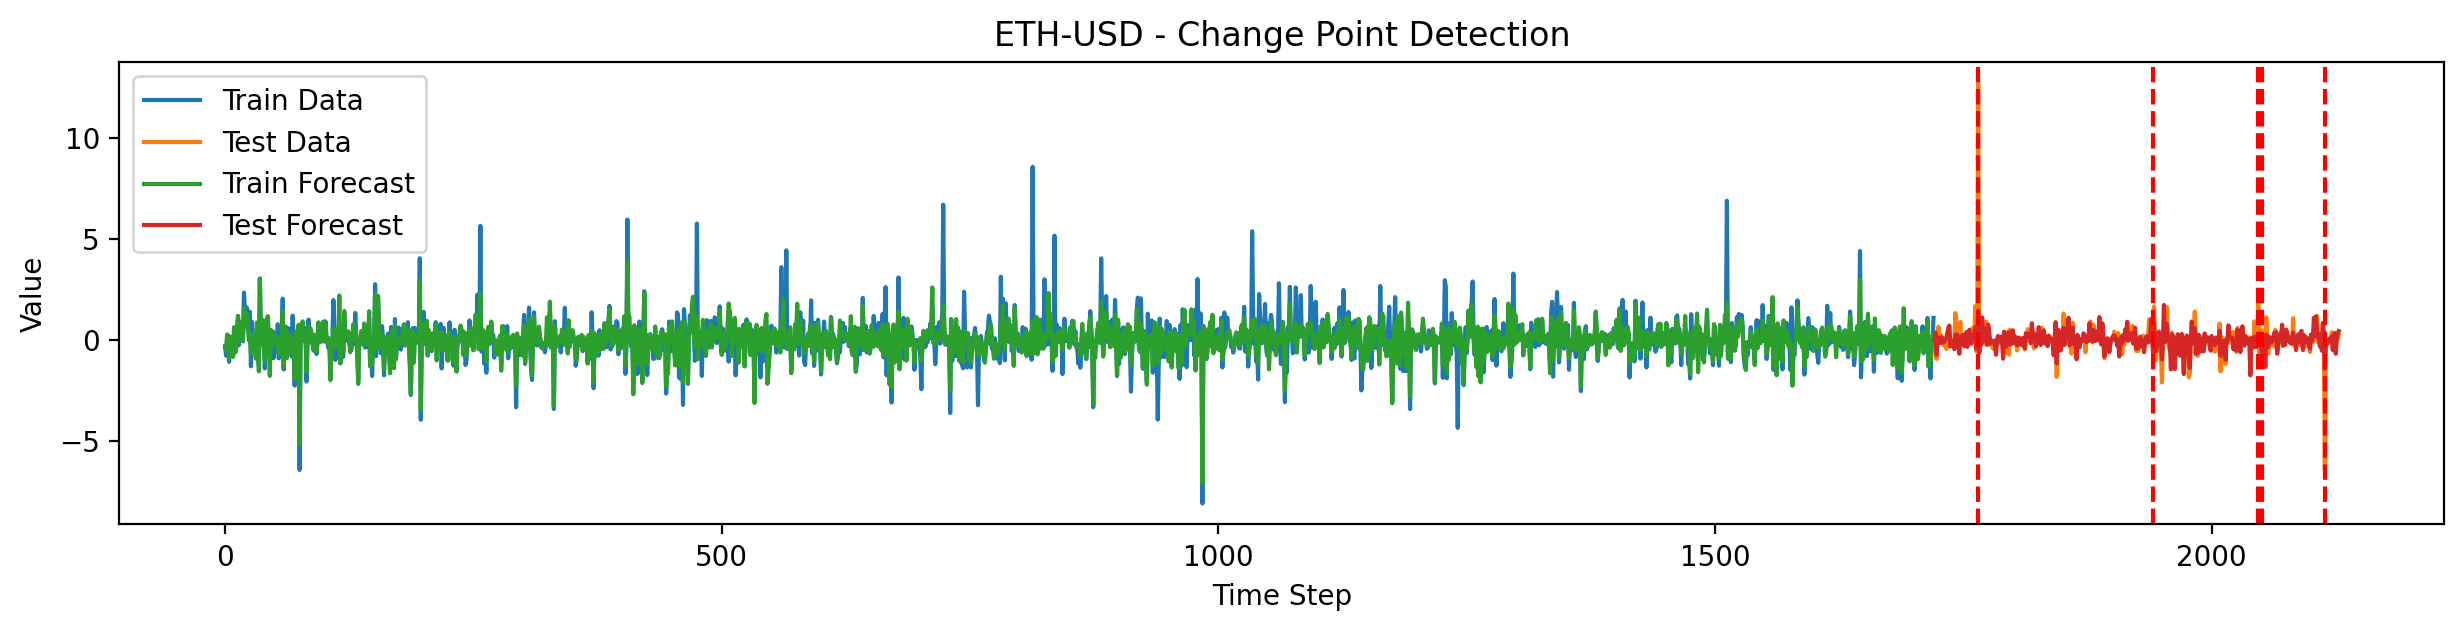

Mean ADD for ETH-USD: 43.99954337899543, Mean FDD for ETH-USD: 87.25


In [52]:
# Пример работы с конкретной монетой
asset_name = 'ETH-USD'
detector.plot_individual_series(change_points, asset_name)

# Загрузка реальных точек разладки для конкретной монеты
true_change_points_df = all_change_points
true_change_points = {detector.asset_names.index(asset_name): true_change_points_df[asset_name].dropna().tolist()}

# Вычисление метрик детекции для конкретной монеты
mean_ADD, mean_FDD = detector.calculate_detection_metrics(true_change_points, detection_times)
print(f'Mean ADD for {asset_name}: {mean_ADD}, Mean FDD for {asset_name}: {mean_FDD}')

# # Вычисление метрик предсказания для конкретной монеты
# precision, recall, f1 = detector.calculate_prediction_metrics(true_change_points, detection_times)
# print(f'Precision for {asset_name}: {precision:.2f}, Recall for {asset_name}: {recall:.2f}, F1-Score for {asset_name}: {f1:.2f}')